<a href="https://colab.research.google.com/github/anasshamoon12002/data-mining-2023-24/blob/main/data_und_new_jona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Understanding

### Preliminary

In [335]:
import numpy as np
import pandas as pd
import seaborn as sn
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import missingno as msno

Read the incidents data



In [336]:
df_incidents = pd.read_csv('data/incidents.csv')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3972\1648718828.py:1: DtypeWarning: Columns (15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_incidents = pd.read_csv('data/incidents.csv')


# Basic Information about the Incidents Data Set

In [337]:
# Display the first few rows of the dataset to get a feel for the data
print(df_incidents.head())

         date                 state city_or_county  \
0  2015-05-02               Indiana   Indianapolis   
1  2017-04-03          Pennsylvania           Kane   
2  2016-11-05              Michigan        Detroit   
3  2016-10-15  District of Columbia     Washington   
4  2030-06-14          Pennsylvania     Pittsburgh   

                              address  latitude  longitude  \
0       Lafayette Road and Pike Plaza   39.8322   -86.2492   
1                           5647 US 6   41.6645   -78.7856   
2   6200 Block of East McNichols Road   42.4190   -83.0393   
3  1000 block of Bladensburg Road, NE   38.9030   -76.9820   
4     California and Marshall Avenues   40.4621   -80.0308   

   congressional_district  state_house_district  state_senate_district  \
0                     7.0                  94.0                   33.0   
1                     5.0                   NaN                    NaN   
2                    14.0                   4.0                    2.0   
3     

We can already observer some information from the head about the dataframe that we need to handle
- There are null or missing values in some attributes
- There are some dates which are in the future
- The various district fields are represented as numerical values but we may not perform any numerical computations on them so maybe we can make them categorical or leave them as integer strings
- Some columns like participant_age1 must be integers not floats
- We may also want toe preprocess incident_characteristics columns and extract some features from there as well

In [338]:
# Basic Info
df_incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date                       239677 non-null  object 
 1   state                      239677 non-null  object 
 2   city_or_county             239677 non-null  object 
 3   address                    223180 non-null  object 
 4   latitude                   231754 non-null  float64
 5   longitude                  231754 non-null  float64
 6   congressional_district     227733 non-null  float64
 7   state_house_district       200905 non-null  float64
 8   state_senate_district      207342 non-null  float64
 9   participant_age1           147379 non-null  float64
 10  participant_age_group1     197558 non-null  object 
 11  participant_gender1        203315 non-null  object 
 12  min_age_participants       164879 non-null  object 
 13  avg_age_participants       16

We can also observe from this information about the data that
- There are 239677 records in the incidents dataset
- date, state, city_or_country, n_killed, n_injured are the only columns or attributes without null or missing values
- Also we can observe that some columns like min_age_participants, avg_age_participants, max_age_participants, n_participants_child, n_participants_teen and n_participants_adult are objects but need to be integers or numemrical

# Descriptive Statistics

In [339]:
# Describe categorical columns
df_incidents.select_dtypes(include=['object']).describe()

,date,state,city_or_county,address,participant_age_group1,participant_gender1,min_age_participants,avg_age_participants,max_age_participants,n_participants_child,n_participants_teen,n_participants_adult,notes,incident_characteristics1,incident_characteristics2
count,239677,239677,239677,223180,197558,203315,164879,165057,164969,197573,197578,197575.0,158660,239351,141931
unique,2437,51,12898,198037,3,3,12673,12869,12852,32,42,70.0,136652,52,90
top,2017-01-01,Illinois,Chicago,2375 International Pkwy,Adult 18+,Male,19.0,22.0,24.0,0.0,0.0,1.0,man shot,Shot - Wounded/Injured,Officer Involved Incident
freq,342,17556,10814,160,181324,177945,7981,7606,6237,105933,104989,62938.0,501,93926,13881


From here we can also observe some statistics about the object columns in the data frame
- Columns with few unique values can be very useful as categorical dtypes 
- We can also observe that gender must be Male or Famale (as the project description mentioned that it is the exact gender) but there are three unique values
- We can also observe the most top value in each of the columns

In [340]:
# Describe numerical data - integers
df_incidents.select_dtypes(include=['int64', 'float64']).describe()

,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants
count,231754.000000,231754.000000,227733.000000,200905.000000,207342.00000,147379.000000,203315.000000,203315.000000,239677.000000,239677.000000,212051.000000,212051.000000,239677.000000
mean,37.546598,-89.338348,8.001265,55.447132,20.47711,30.295707,1.520252,0.212340,0.252290,0.494007,0.468439,0.494169,1.636895
std,5.130763,14.359546,8.480835,42.048117,14.20456,13.363592,0.996767,0.490888,0.521779,0.729952,0.851035,0.925566,1.252514
min,19.111400,-171.429000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.903400,-94.158725,2.000000,21.000000,9.00000,21.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,38.570600,-86.249600,5.000000,47.000000,19.00000,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,41.437375,-80.048625,10.000000,84.000000,30.00000,37.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000
max,71.336800,97.433100,53.000000,901.000000,94.00000,311.000000,61.000000,23.000000,50.000000,53.000000,63.000000,20.000000,103.000000


From tha above also we can observe some descriptive statistics about the various numerical fields, that is integers and floats

In [341]:
# Identify columns with mixed types
mixed_type_cols = df_incidents.applymap(type).nunique() > 1
mixed_cols = mixed_type_cols.index[mixed_type_cols].tolist()

print("Columns with mixed types:", mixed_cols)
print("Number of columns with mixed types:", len(mixed_cols))

# For each mixed-type column, identify the unique types
for col in mixed_cols:
    unique_types = df_incidents[col].apply(type).unique()
    print(f"Unique types in column {col}: {unique_types}")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3972\1691705460.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mixed_type_cols = df_incidents.applymap(type).nunique() > 1


Columns with mixed types: ['address', 'participant_age_group1', 'participant_gender1', 'min_age_participants', 'avg_age_participants', 'max_age_participants', 'n_participants_child', 'n_participants_teen', 'n_participants_adult', 'notes', 'incident_characteristics1', 'incident_characteristics2']
Number of columns with mixed types: 12
Unique types in column address: [<class 'str'> <class 'float'>]
Unique types in column participant_age_group1: [<class 'str'> <class 'float'>]
Unique types in column participant_gender1: [<class 'str'> <class 'float'>]
Unique types in column min_age_participants: [<class 'str'> <class 'float'>]
Unique types in column avg_age_participants: [<class 'str'> <class 'float'>]
Unique types in column max_age_participants: [<class 'str'> <class 'float'>]
Unique types in column n_participants_child: [<class 'float'> <class 'str'>]
Unique types in column n_participants_teen: [<class 'float'> <class 'str'>]
Unique types in column n_participants_adult: [<class 'float'>

In [342]:
#Now we can cast min_age_participants, avg_age_participants, max_age_participants, n_participants_child, n_participants_teen, n_participants_adult to float
#Use errors='coerce' to set invalid parsing to NaN
df_incidents['min_age_participants'] = pd.to_numeric(df_incidents['min_age_participants'], errors='coerce')
df_incidents['avg_age_participants'] = pd.to_numeric(df_incidents['avg_age_participants'], errors='coerce')
df_incidents['max_age_participants'] = pd.to_numeric(df_incidents['max_age_participants'], errors='coerce')
df_incidents['n_participants_child'] = pd.to_numeric(df_incidents['n_participants_child'], errors='coerce')
df_incidents['n_participants_teen'] = pd.to_numeric(df_incidents['n_participants_teen'], errors='coerce')
df_incidents['n_participants_adult'] = pd.to_numeric(df_incidents['n_participants_adult'], errors='coerce')


Numerical columns with mixed types have also been worked on

In [343]:
#Check the data types again
df_incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date                       239677 non-null  object 
 1   state                      239677 non-null  object 
 2   city_or_county             239677 non-null  object 
 3   address                    223180 non-null  object 
 4   latitude                   231754 non-null  float64
 5   longitude                  231754 non-null  float64
 6   congressional_district     227733 non-null  float64
 7   state_house_district       200905 non-null  float64
 8   state_senate_district      207342 non-null  float64
 9   participant_age1           147379 non-null  float64
 10  participant_age_group1     197558 non-null  object 
 11  participant_gender1        203315 non-null  object 
 12  min_age_participants       159126 non-null  float64
 13  avg_age_participants       15

The data types look good now

# Null Values or Missing values

In [344]:
#Find nulls in all the columns
print(df_incidents.isnull().sum())

date                             0
state                            0
city_or_county                   0
address                      16497
latitude                      7923
longitude                     7923
congressional_district       11944
state_house_district         38772
state_senate_district        32335
participant_age1             92298
participant_age_group1       42119
participant_gender1          36362
min_age_participants         80551
avg_age_participants         80509
max_age_participants         80593
n_participants_child         42109
n_participants_teen          42106
n_participants_adult         42105
n_males                      36362
n_females                    36362
n_killed                         0
n_injured                        0
n_arrested                   27626
n_unharmed                   27626
n_participants                   0
notes                        81017
incident_characteristics1      326
incident_characteristics2    97746
dtype: int64


### Visualize the missing data

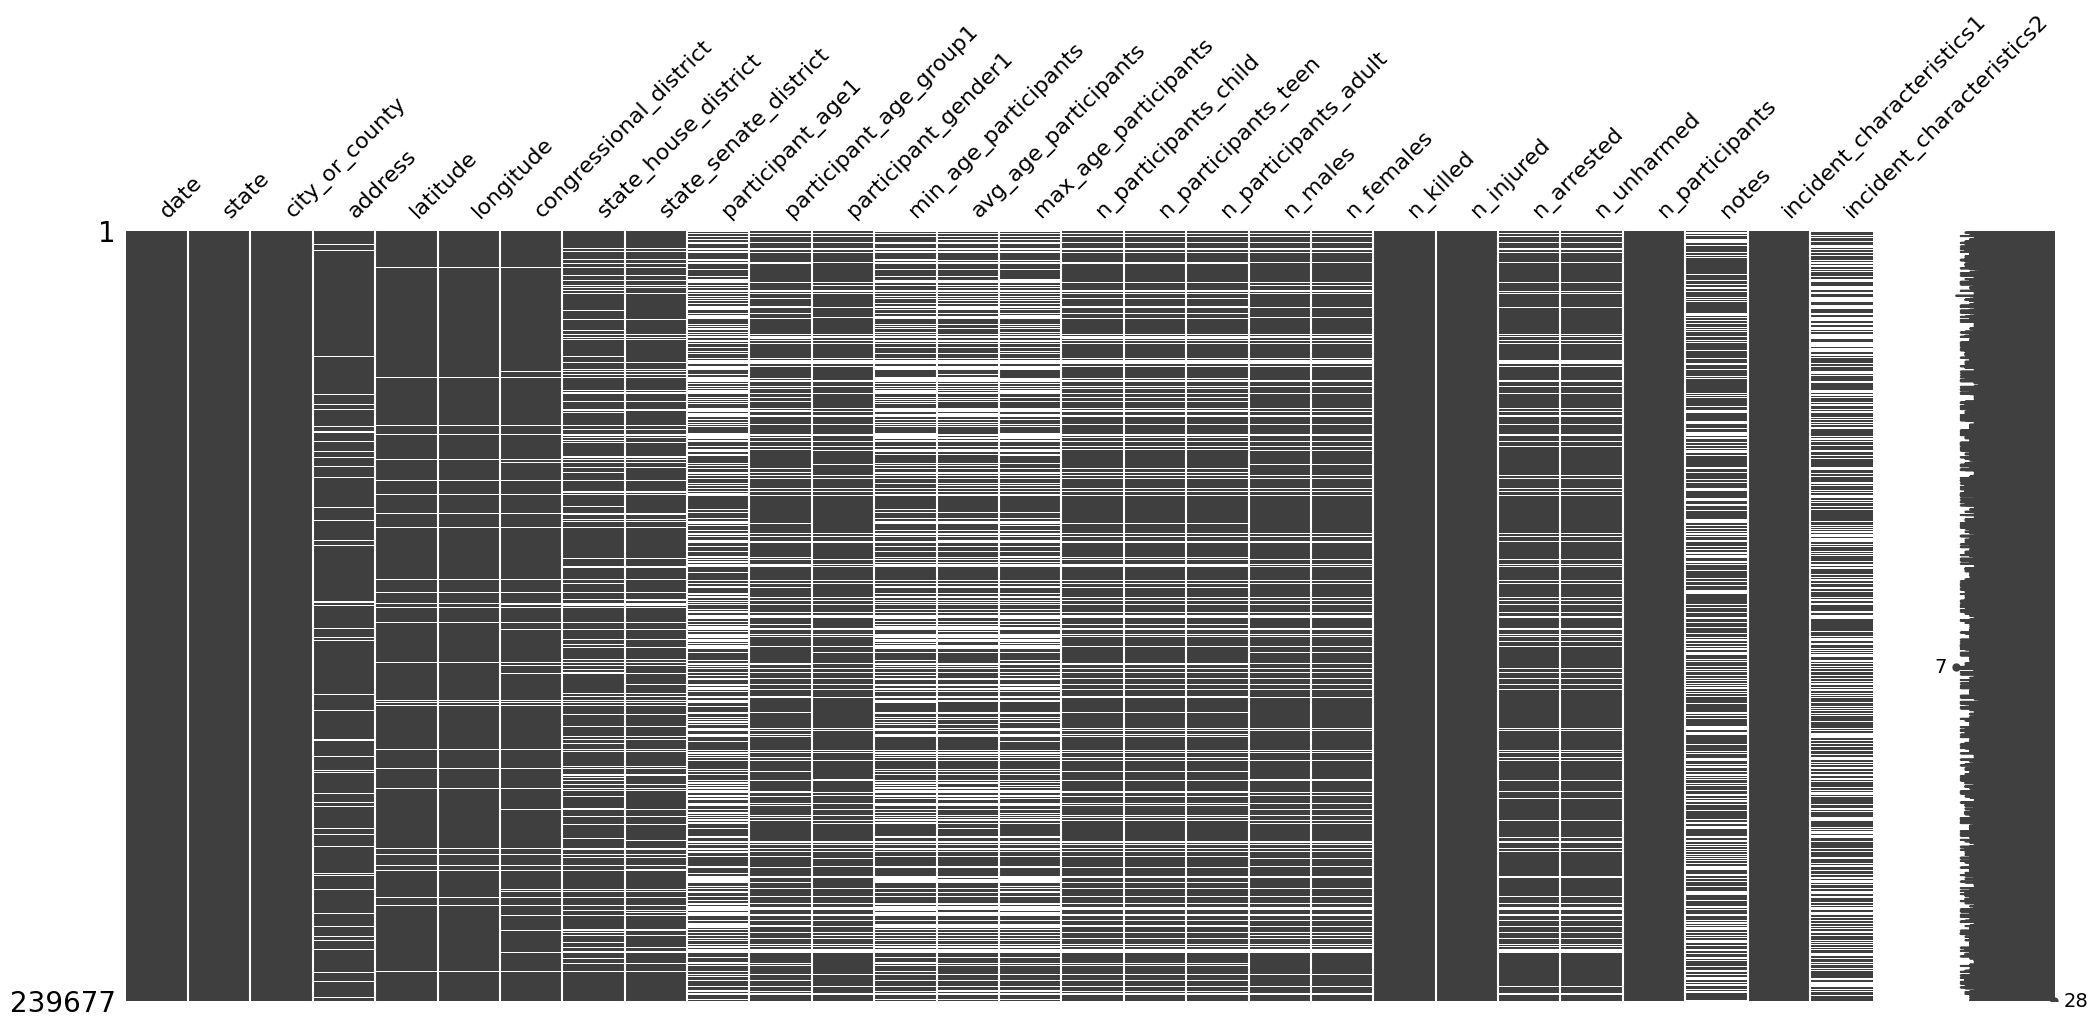

<Figure size 1500x900 with 0 Axes>

In [345]:
#Use the nullity matrix to get a quick visual summary of the data completeness
msno.matrix(df_incidents)
plt.figure(figsize = (15,9))
plt.show()

From the above we can easily see that our incident dataset has a lot of missing values in it.
The nullity matrix that allows us to see the distribution of data across all columns in the whole dataset. It also shows a sparkline (or, in some cases, a striped line) that emphasizes rows in a dataset with the highest and lowest nullity.

<Axes: >

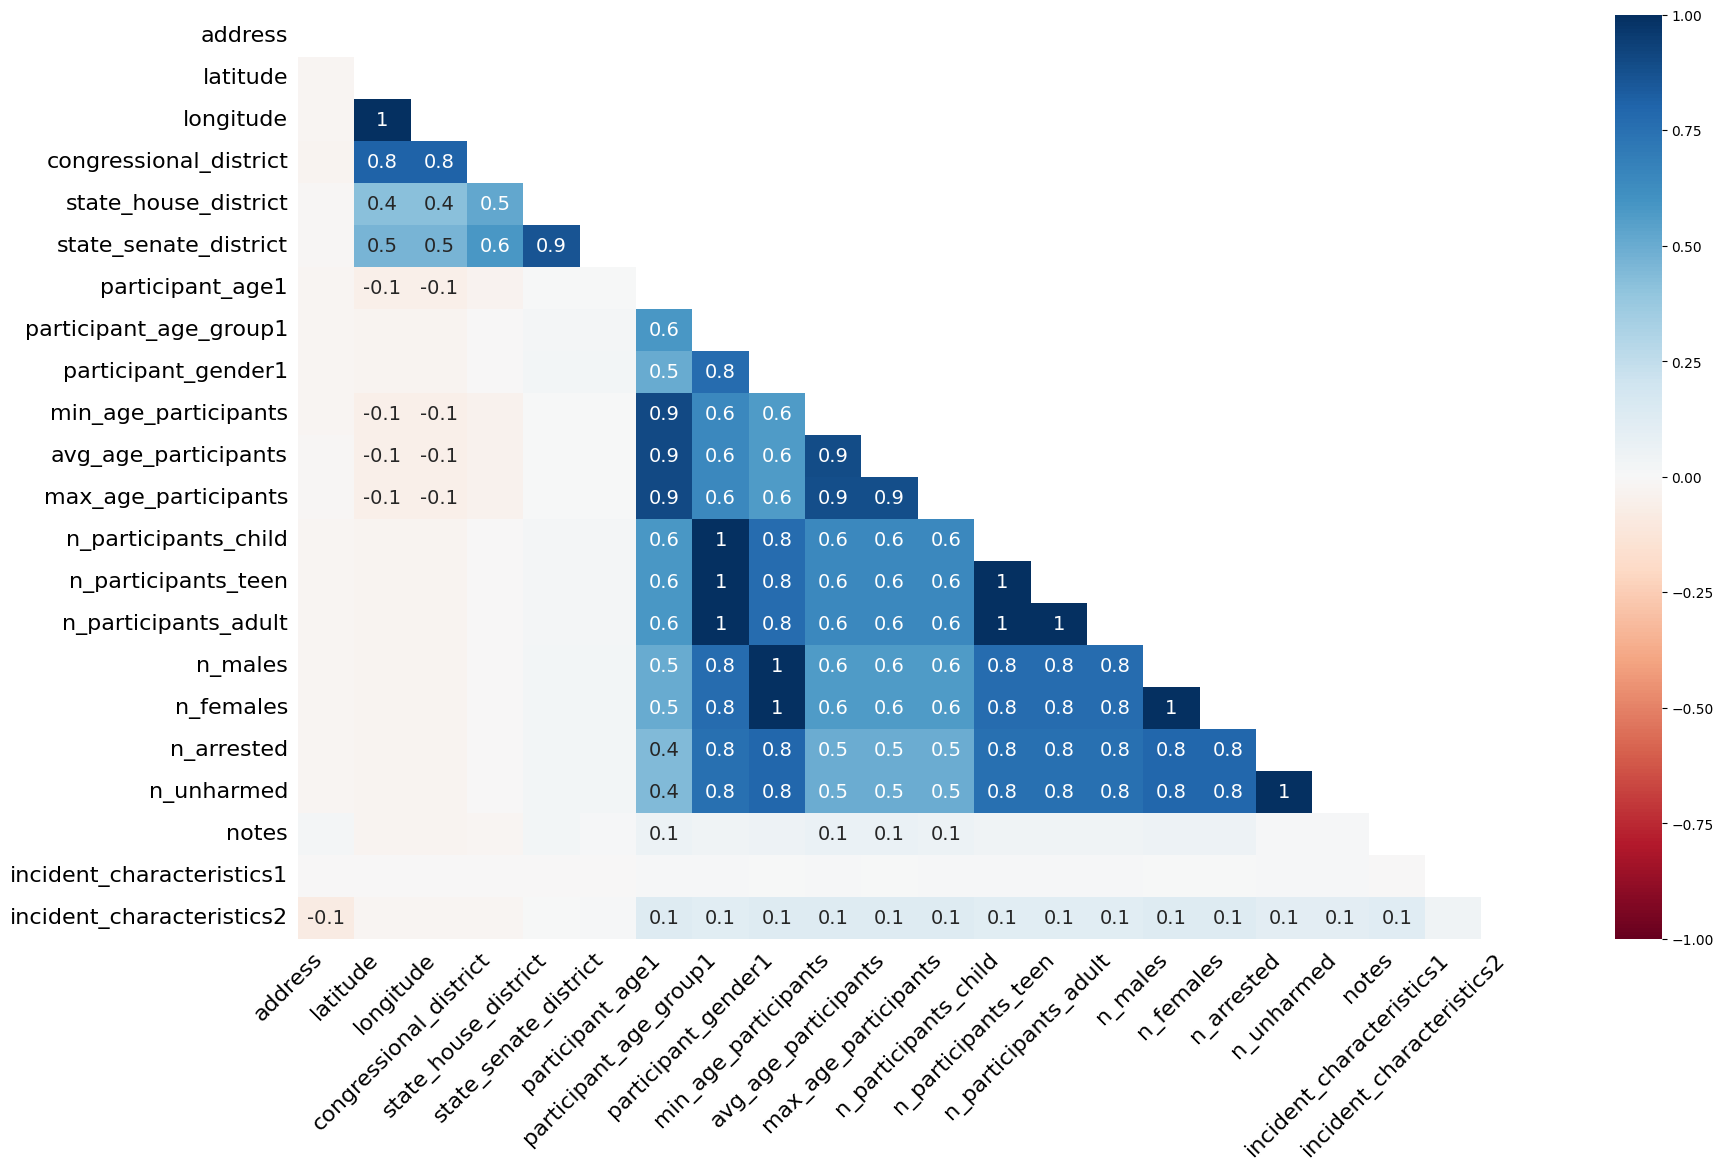

In [346]:
#Correlation Heatmap
msno.heatmap(df_incidents, labels = True)

Correlation heatmap measures nullity correlation between columns of the incidents dataset. It shows how strongly the presence or absence of one feature affects the other.

Nullity correlation ranges from(-1 to 1):

- -1 means if one column(attribute) is present, the other is almost certainly absent.
- 0 means there is no dependence between the columns(attributes).
- 1 means if one column(attributes) is present, the other is also certainly present.
Unlike in a familiar correlation heatmap, if you see here, many columns are missing. Those columns which are always full or always empty have no meaningful correlation and are removed from the visualization.

The heatmap is helpful for identifying data completeness correlations between attribute pairs, but it has the limited explanatory ability for broader relationships and no special support for really big datasets.

- We can observe that the missingness of longitude and latitude are dependent on each other as they have a correlation of 1

In [347]:
#Percentage of missing values in each column
missing_data = pd.DataFrame({'total_missing': df_incidents.isnull().sum(), 'perc_missing': (df_incidents.isnull().sum()/len(df_incidents))*100})
missing_data



,total_missing,perc_missing
date,0,0.000000
state,0,0.000000
city_or_county,0,0.000000
address,16497,6.883013
latitude,7923,3.305699
longitude,7923,3.305699
congressional_district,11944,4.983373
state_house_district,38772,16.176771
state_senate_district,32335,13.491073
participant_age1,92298,38.509327


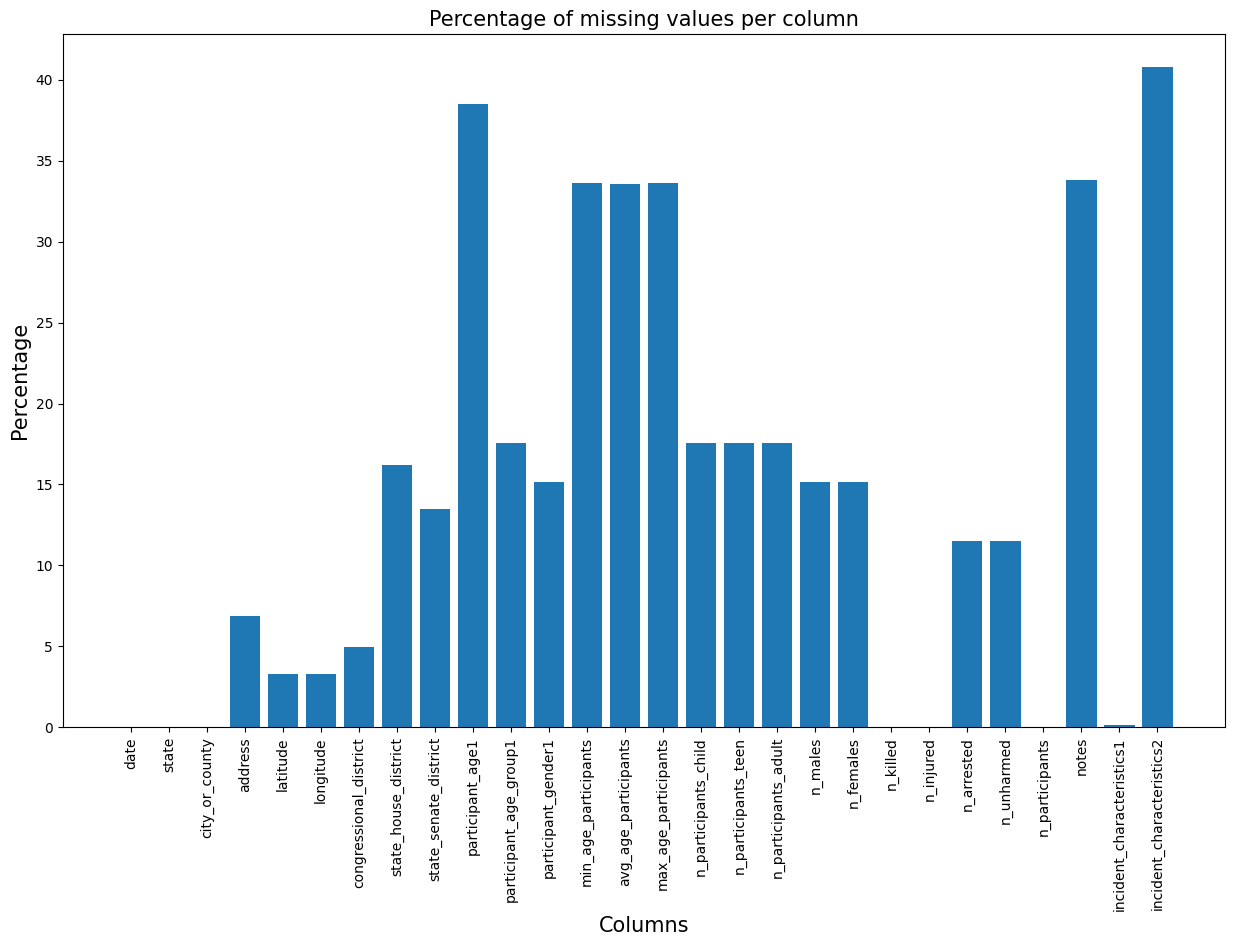

In [348]:
#Plot the missing values percentage for each column
plt.figure(figsize = (15,9))
plt.xticks(rotation = 90)
plt.xlabel("Columns", fontsize = 15)
plt.ylabel("Percentage", fontsize = 15)
plt.title("Percentage of missing values per column", fontsize = 15)
plt.bar(missing_data.index, missing_data['perc_missing'])
plt.show()

# Syntactic and Semantic Accuracy

## Dates

In [349]:
# Check for the presence of future dates
df_incidents['datetime'] = pd.to_datetime(df_incidents['date'])

# Extract Year, Month, Day, and other components
df_incidents['year'] = df_incidents['datetime'].dt.year
df_incidents['month'] = df_incidents['datetime'].dt.month
df_incidents['day'] = df_incidents['datetime'].dt.day
df_incidents['weekday'] = df_incidents['datetime'].dt.weekday  # Where Monday is 0 and Sunday is 6

By doing this operation we have extracted new features from the date field that we can use in further operations in the data mining process

In [350]:
# Filter directly to get the count of dates in the future
future_dates_count = df_incidents[df_incidents['datetime'] > pd.Timestamp.now()].shape[0]

print(f"Number of dates in the future: {future_dates_count}")

# Statistics about those future dates:
future_dates_stats = df_incidents[df_incidents['datetime'] > pd.Timestamp.now()]['datetime'].describe()
print(future_dates_stats)

Number of dates in the future: 23031
count                            23031
mean     2029-11-06 07:44:52.145369344
min                2028-01-18 00:00:00
25%                2029-05-29 00:00:00
50%                2029-10-02 00:00:00
75%                2030-04-30 00:00:00
max                2030-11-28 00:00:00
Name: datetime, dtype: object


In [351]:
#Print the percentage of future dates
print(f"Percentage of future dates: {future_dates_count/df_incidents.shape[0] * 100}")

Percentage of future dates: 9.609182357923371


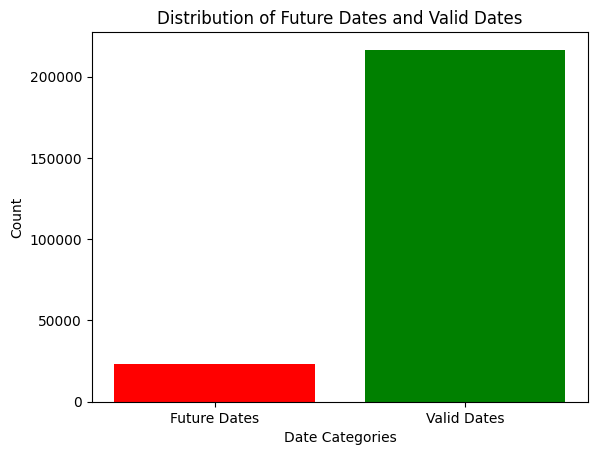

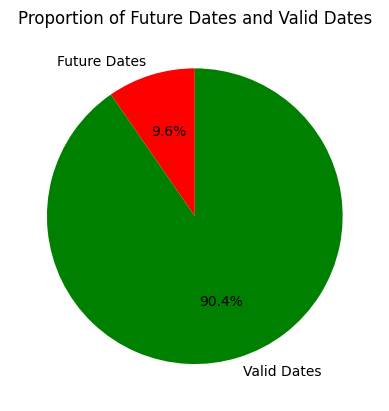

In [352]:
# Count of dates in the future and valid dates
counts = [future_dates_count, len(df_incidents) - future_dates_count]
labels = ['Future Dates', 'Valid Dates']


# Create a bar plot
plt.bar(labels, counts, color=['red', 'green'])
plt.xlabel('Date Categories')
plt.ylabel('Count')
plt.title('Distribution of Future Dates and Valid Dates')
plt.show()

# Create a pie chart
plt.pie(counts, labels=labels, colors=['red', 'green'], autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Future Dates and Valid Dates')
plt.show()

In [353]:
#check the dtpye of the datetime column

# Now we do the same for dates before 2000
past_dates_condition = df_incidents['datetime'] < pd.Timestamp.fromisoformat('2000-01-01 00:00:00')
past_dates_count = len(df_incidents[past_dates_condition])

print(f"Number of dates in the past: {past_dates_count}")

# Statistics about those future dates:
past_dates_stats = df_incidents[past_dates_condition]['datetime'].describe()
print(past_dates_stats)

Number of dates in the past: 0
count      0
mean     NaT
min      NaT
25%      NaT
50%      NaT
75%      NaT
max      NaT
Name: datetime, dtype: object


In [354]:
# Filter to get the count of dates earlier than 2000 (past dates)
past_dates_count = df_incidents[df_incidents['datetime'].dt.year < 2000].shape[0]
print(f"Number of dates earlier than 2000: {past_dates_count}")

# Statistics about those past dates:
past_dates_stats = df_incidents[df_incidents['datetime'].dt.year < 2000]['datetime'].describe()
print(past_dates_stats)

Number of dates earlier than 2000: 0
count      0
mean     NaT
min      NaT
25%      NaT
50%      NaT
75%      NaT
max      NaT
Name: datetime, dtype: object


In [355]:
#Print number of records in the dataframe
print(f"Number of records in the dataframe: {len(df_incidents)}")

Number of records in the dataframe: 239677


In [356]:
# Now remove future dates
df_incidents = df_incidents[df_incidents['datetime'] <= pd.Timestamp.now()]
print(f"Now dataframe has {len(df_incidents)} records.")

Now dataframe has 216646 records.


In [357]:
#Casting to appropriate Types (Numerical)

#Also cast min_age_participants, avg_age_participants, max_age_participants, n_participants_child, n_participants_teen, n_participants_adult to float
#Use errors='coerce' to set invalid parsing to NaN
df_incidents['min_age_participants'] = pd.to_numeric(df_incidents['min_age_participants'], errors='coerce')
df_incidents['avg_age_participants'] = pd.to_numeric(df_incidents['avg_age_participants'], errors='coerce')
df_incidents['max_age_participants'] = pd.to_numeric(df_incidents['max_age_participants'], errors='coerce')
df_incidents['n_participants_child'] = pd.to_numeric(df_incidents['n_participants_child'], errors='coerce')
df_incidents['n_participants_teen'] = pd.to_numeric(df_incidents['n_participants_teen'], errors='coerce')
df_incidents['n_participants_adult'] = pd.to_numeric(df_incidents['n_participants_adult'], errors='coerce')

## State

In [358]:
state_value_counts = df_incidents['state'].value_counts()
print(f"There are {len(state_value_counts)} distinct values for the 'state' field.")
print(state_value_counts)

There are 51 distinct values for the 'state' field.
state
Illinois                16923
California              14504
Florida                 13290
Texas                   11847
Ohio                     9166
New York                 9054
Pennsylvania             8084
Georgia                  7973
North Carolina           7678
Louisiana                7269
Tennessee                6586
Missouri                 6342
South Carolina           6195
Massachusetts            5539
Michigan                 5527
Indiana                  5181
Virginia                 5158
New Jersey               4968
Maryland                 4945
Alabama                  4666
Wisconsin                4450
Kentucky                 3633
Oklahoma                 3249
Mississippi              3176
Washington               3083
Colorado                 3031
Connecticut              2847
Arkansas                 2629
District of Columbia     2575
Iowa                     2439
Minnesota                2315
Oregon      

## Numerical Fields

### Latitude and Longitude

In [359]:
cols_to_check = ['latitude', 'longitude']
extremes = [90.0, 180.0]
for col, extr in zip(cols_to_check, extremes):
  condition = (df_incidents[col] < -extr) | (df_incidents[col] > extr)
  uncorrect_values = df_incidents[condition]
  print(f"'{col}' field has {len(uncorrect_values)} incorrect values")

'latitude' field has 0 incorrect values
'longitude' field has 0 incorrect values


### Other Fields

In [360]:
# Check for negative values in some numerical fields that are not supposed to be negative
# Columns to cast and then check for negative values
cols_to_check = [
    'participant_age1', 'min_age_participants', 'avg_age_participants', 'max_age_participants',
    'n_participants_child', 'n_participants_teen', 'n_participants_adult', 'n_males', 'n_females',
    'n_killed', 'n_injured', 'n_arrested', 'n_unharmed', 'n_participants'
]

In [361]:
# Function to identify non-convertible strings in specified columns
def find_non_convertible_strings(df, col):
    non_convertible = []
    for idx, val in enumerate(df[col]):
        try:
            float(val)
        except ValueError:
            non_convertible.append((idx, val))
    return non_convertible

In [362]:
# Checking non-convertible strings for each column
for col in cols_to_check:
    problematic_values = find_non_convertible_strings(df_incidents, col)
    if problematic_values:
        print(f"Column {col} has {len(problematic_values)} non-convertible values")
    else:
        print(f"Column {col} has all convertible values.")

Column participant_age1 has all convertible values.
Column min_age_participants has all convertible values.
Column avg_age_participants has all convertible values.
Column max_age_participants has all convertible values.
Column n_participants_child has all convertible values.
Column n_participants_teen has all convertible values.
Column n_participants_adult has all convertible values.
Column n_males has all convertible values.
Column n_females has all convertible values.
Column n_killed has all convertible values.
Column n_injured has all convertible values.
Column n_arrested has all convertible values.
Column n_unharmed has all convertible values.
Column n_participants has all convertible values.


Now remove records with strings instead of floats.

In [363]:
def remove_non_numeric_records(df, col, desired_dtype):
  df[col] = pd.to_numeric(df[col], errors='coerce')
  #condition = condition = df['B'].notna() | (df['B'].apply(lambda x: isinstance(x, desired_dtype)))
  #df = df[condition]
  return df

In [364]:
df_backup = df_incidents.copy()

In [365]:
import numpy as np
float64 = np.float64

cols_to_check = [
    'min_age_participants', 'avg_age_participants', 'max_age_participants',
    'n_participants_child', 'n_participants_teen', 'n_participants_adult',
]

for col in cols_to_check:
  df_incidents = remove_non_numeric_records(df_incidents, col, float64)

In [366]:
# Checking and printing counts for each column
for col in cols_to_check:
    unconvertible_count = len(find_non_convertible_strings(df_incidents, col))
    print(f"Column {col} has {unconvertible_count} unconvertible values.")

Column min_age_participants has 0 unconvertible values.
Column avg_age_participants has 0 unconvertible values.
Column max_age_participants has 0 unconvertible values.
Column n_participants_child has 0 unconvertible values.
Column n_participants_teen has 0 unconvertible values.
Column n_participants_adult has 0 unconvertible values.


Now let's do a rapid check of the current state of the dataframe.

In [367]:
df_incidents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 216646 entries, 0 to 239676
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date                       216646 non-null  object        
 1   state                      216646 non-null  object        
 2   city_or_county             216646 non-null  object        
 3   address                    201930 non-null  object        
 4   latitude                   208743 non-null  float64       
 5   longitude                  208743 non-null  float64       
 6   congressional_district     204729 non-null  float64       
 7   state_house_district       180836 non-null  float64       
 8   state_senate_district      186894 non-null  float64       
 9   participant_age1           147255 non-null  float64       
 10  participant_age_group1     174651 non-null  object        
 11  participant_gender1        180284 non-null  object       

Now we cleanup negative data from numerical fields:

In [368]:
cols_to_check = [
    'participant_age1', 'min_age_participants', 'avg_age_participants', 'max_age_participants',
    'n_participants_child', 'n_participants_teen', 'n_participants_adult', 'n_males', 'n_females',
    'n_killed', 'n_injured', 'n_arrested', 'n_unharmed', 'n_participants'
]

# First, we see how many negative values are present for each column
for col in cols_to_check:
  condition = df_incidents[col] < 0
  print(f"Column '{col}' has {len(df_incidents[condition])} negative values.")

# Then, we eliminate those columns
for col in cols_to_check:
  df_incidents = df_incidents[(df_incidents[col] >= 0) | df_incidents[col].isnull()]

#Print horizantal line to separate the output
print("-"*100)
# Finally, we check again to see if there are negative values
for col in cols_to_check:
  condition = df_incidents[col] < 0
  print(f"Column '{col}' has {len(df_incidents[condition])} negative values.")

Column 'participant_age1' has 0 negative values.
Column 'min_age_participants' has 5897 negative values.
Column 'avg_age_participants' has 5877 negative values.
Column 'max_age_participants' has 5809 negative values.
Column 'n_participants_child' has 4 negative values.
Column 'n_participants_teen' has 10 negative values.
Column 'n_participants_adult' has 8 negative values.
Column 'n_males' has 0 negative values.
Column 'n_females' has 0 negative values.
Column 'n_killed' has 0 negative values.
Column 'n_injured' has 0 negative values.
Column 'n_arrested' has 0 negative values.
Column 'n_unharmed' has 0 negative values.
Column 'n_participants' has 0 negative values.
----------------------------------------------------------------------------------------------------
Column 'participant_age1' has 0 negative values.
Column 'min_age_participants' has 0 negative values.
Column 'avg_age_participants' has 0 negative values.
Column 'max_age_participants' has 0 negative values.
Column 'n_partici

In [369]:
df_incidents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203061 entries, 0 to 239675
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date                       203061 non-null  object        
 1   state                      203061 non-null  object        
 2   city_or_county             203061 non-null  object        
 3   address                    189114 non-null  object        
 4   latitude                   195650 non-null  float64       
 5   longitude                  195650 non-null  float64       
 6   congressional_district     191954 non-null  float64       
 7   state_house_district       169432 non-null  float64       
 8   state_senate_district      175035 non-null  float64       
 9   participant_age1           147238 non-null  float64       
 10  participant_age_group1     161083 non-null  object        
 11  participant_gender1        166699 non-null  object       

We now check and filter out fields which do not respect semantic correctness. In particular, we check for the following:
* min_age_participants $\leq$ avg_age_participants $\leq$ max_age_participants;
* n_males, n_females, n_killed, n_injured, n_arrested, n_unharmed $\leq$ n_participants.

In [370]:
df_backup = df_incidents.copy()

In [371]:
# Check for min_age_participants <= avg_age_participants <= max_age_participants
condition = df_incidents['min_age_participants'].isnull() | \
  df_incidents['avg_age_participants'].isnull() | \
  df_incidents['max_age_participants'].isnull() | \
 ((df_incidents['min_age_participants'] <= df_incidents['avg_age_participants']) & \
 (df_incidents['avg_age_participants'] <= df_incidents['max_age_participants']))

df_records_number = len(df_incidents)
df_incidents = df_incidents[condition]
print(f"Dataframe contained {df_records_number - len(df_incidents)} records that did not respect 'min_age_participants' <= 'avg_age_participants' <= 'max_age_participants'.")

Dataframe contained 295 records that did not respect 'min_age_participants' <= 'avg_age_participants' <= 'max_age_participants'.


In [372]:
df_incidents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202766 entries, 0 to 239675
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date                       202766 non-null  object        
 1   state                      202766 non-null  object        
 2   city_or_county             202766 non-null  object        
 3   address                    188836 non-null  object        
 4   latitude                   195366 non-null  float64       
 5   longitude                  195366 non-null  float64       
 6   congressional_district     191677 non-null  float64       
 7   state_house_district       169184 non-null  float64       
 8   state_senate_district      174779 non-null  float64       
 9   participant_age1           147238 non-null  float64       
 10  participant_age_group1     160788 non-null  object        
 11  participant_gender1        166404 non-null  object       

In [373]:
# Check for n_males, n_females, n_killed, n_injured, n_arrested, n_unharmed <= n_participants
cols_to_check = [
    'n_males', 'n_females', 'n_killed', 'n_injured', 'n_arrested', 'n_unharmed',
    'n_participants_child', 'n_participants_teen', 'n_participants_adult',
]
for col in cols_to_check:
  condition = df_incidents['n_participants'].isnull() | \
    df_incidents[col].isnull() | (df_incidents[col] <= df_incidents['n_participants'])
  df_records_number = len(df_incidents)
  df_incidents = df_incidents[condition]
  print(f"Dataframe contained {df_records_number - len(df_incidents)} records that did not respect '{col}' <= 'n_participants'.")

Dataframe contained 0 records that did not respect 'n_males' <= 'n_participants'.
Dataframe contained 0 records that did not respect 'n_females' <= 'n_participants'.
Dataframe contained 0 records that did not respect 'n_killed' <= 'n_participants'.
Dataframe contained 0 records that did not respect 'n_injured' <= 'n_participants'.
Dataframe contained 0 records that did not respect 'n_arrested' <= 'n_participants'.
Dataframe contained 0 records that did not respect 'n_unharmed' <= 'n_participants'.
Dataframe contained 2 records that did not respect 'n_participants_child' <= 'n_participants'.
Dataframe contained 1 records that did not respect 'n_participants_teen' <= 'n_participants'.
Dataframe contained 1 records that did not respect 'n_participants_adult' <= 'n_participants'.


In [374]:
# Check for n_males + n_females = n_participants
condition = df_incidents['n_participants'].isnull() | df_incidents['n_males'].isnull() | df_incidents['n_females'].isnull() | (df_incidents['n_males'] + df_incidents['n_females'] == df_incidents['n_participants'])
df_records_number = len(df_incidents)
df_incidents = df_incidents[condition]
print(f"Dataframe contained {df_records_number - len(df_incidents)} records that did not respect 'n_males + n_females == n_participants'.")

Dataframe contained 11296 records that did not respect 'n_males + n_females == n_participants'.


In [375]:
# Check for n_participants_child + n_participants_teen + n_participants_adult == n_participants
condition = df_incidents['n_participants_teen'].isnull() | df_incidents['n_participants_child'].isnull() \
  | df_incidents['n_participants_adult'].isnull() | (df_incidents['n_participants_child'] + df_incidents['n_participants_teen'] + \
    df_incidents['n_participants_adult'] == df_incidents['n_participants'])
df_records_number = len(df_incidents)
df_incidents = df_incidents[condition]
print(f"Dataframe contained {df_records_number - len(df_incidents)} records that did not respect 'n_participants_child + n_participants_teen + n_participants_adult == n_participants'.")

Dataframe contained 9028 records that did not respect 'n_participants_child + n_participants_teen + n_participants_adult == n_participants'.


In [376]:
df_incidents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182438 entries, 0 to 239674
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date                       182438 non-null  object        
 1   state                      182438 non-null  object        
 2   city_or_county             182438 non-null  object        
 3   address                    169632 non-null  object        
 4   latitude                   175903 non-null  float64       
 5   longitude                  175903 non-null  float64       
 6   congressional_district     172551 non-null  float64       
 7   state_house_district       151740 non-null  float64       
 8   state_senate_district      156729 non-null  float64       
 9   participant_age1           129627 non-null  float64       
 10  participant_age_group1     141838 non-null  object        
 11  participant_gender1        146330 non-null  object       

### Congressional/State House/State Senate District

In [377]:
def grouped_value_counts(df, columns):
  return df.copy().groupby(columns).size().unstack().fillna(0)

In [378]:
congressional_district_grouped_df = grouped_value_counts(df_incidents, ['congressional_district', 'state'])

<Axes: xlabel='congressional_district'>

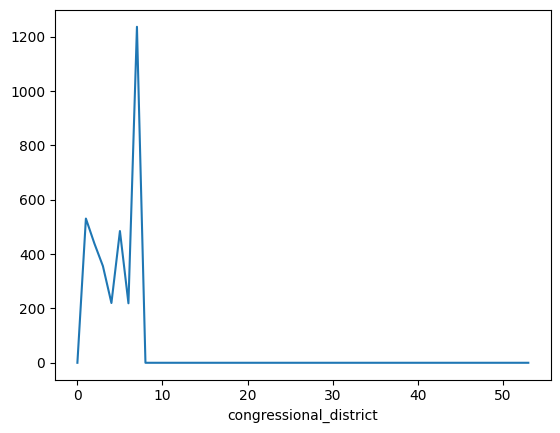

In [379]:
congressional_district_grouped_df['Alabama'].plot()

### Age Group and Gender

participant_age_group1
Adult 18+     128697
Teen 12-17     10966
Child 0-11      2175
Name: count, dtype: int64


<Axes: xlabel='participant_age_group1', ylabel='count'>

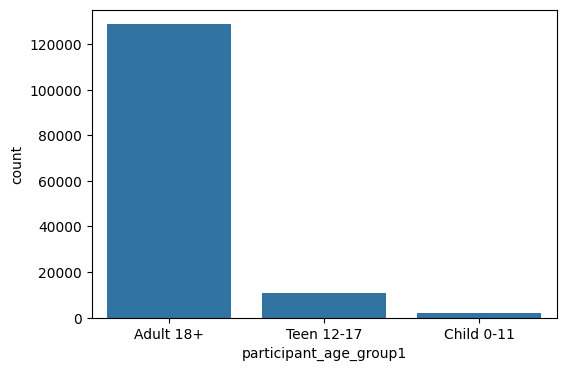

In [380]:
%matplotlib inline
plt.figure(figsize=(6, 4))
age_group_count = df_incidents['participant_age_group1'].value_counts()
print(age_group_count)
sn.countplot(data=df_incidents, x='participant_age_group1')

In [381]:
df_incidents['participant_gender1'].value_counts()

participant_gender1
Male      127632
Female     18698
Name: count, dtype: int64

In [382]:
df_incidents = df_incidents[df_incidents['participant_gender1'] != 'Male, female']

participant_gender1
Male      127632
Female     18698
Name: count, dtype: int64


<Axes: xlabel='participant_gender1', ylabel='count'>

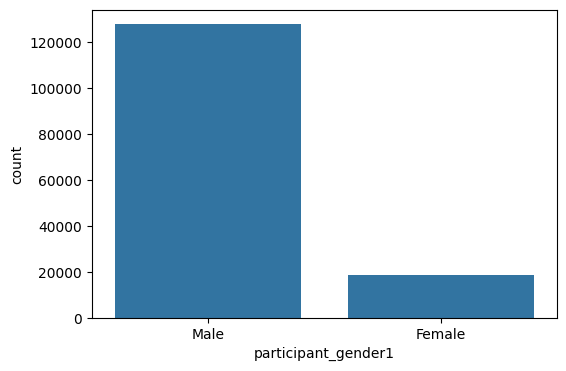

In [383]:
%matplotlib inline
plt.figure(figsize=(6, 4))
age_group_count = df_incidents['participant_gender1'].value_counts()
print(age_group_count)
sn.countplot(data=df_incidents, x='participant_gender1')

### Other String Fields

In [384]:
string_cols_to_check = ['city_or_county', 'address', 'participant_age_group1', 'participant_gender1', 'notes', 'incident_characteristics1', 'incident_characteristics2']

In [385]:
for col in string_cols_to_check:
  values = df_incidents[col].unique()
  numerical_values = [val for val in values if not isinstance(val, str)]
  print(f"Column {col} has values: {numerical_values}")

Column city_or_county has values: []
Column address has values: [nan]
Column participant_age_group1 has values: [nan]
Column participant_gender1 has values: [nan]
Column notes has values: [nan]
Column incident_characteristics1 has values: [nan]
Column incident_characteristics2 has values: [nan]


# Attributes Distribution Visualization and Outliers Detection

### date

In [386]:
df_incidents['datetime'].min(), df_incidents['datetime'].max()  # Hence a total of 63 months (2013-2017 included and three months from 2018)

(Timestamp('2013-01-01 00:00:00'), Timestamp('2018-03-31 00:00:00'))

<Axes: ylabel='Frequency'>

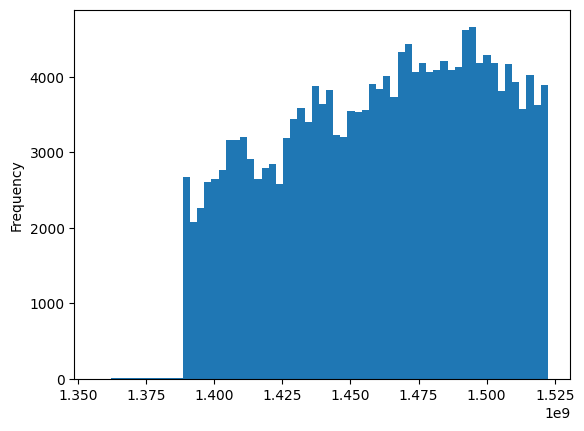

In [387]:
df_incidents['datetime'].apply(lambda x: x.timestamp()).plot(kind='hist', bins=63)

### n_participants

In [388]:
df_incidents['n_participants'].value_counts()

n_participants
1.0     85793
2.0     48647
0.0     24863
3.0     14380
4.0      5392
5.0      2123
6.0       712
7.0       239
8.0       135
9.0        53
10.0       33
11.0       16
12.0       11
15.0        8
13.0        7
19.0        4
16.0        3
14.0        3
17.0        3
35.0        2
20.0        2
18.0        1
21.0        1
32.0        1
52.0        1
27.0        1
26.0        1
22.0        1
24.0        1
63.0        1
Name: count, dtype: int64

We can safely remove by hand all records with values $> 10$.

In [389]:
df_backup = df_incidents.copy()

In [390]:
len(df_incidents[df_incidents['n_participants'] == 0])

24863

In [391]:
len(df_incidents[df_incidents['n_participants'].isnull()])

0

In [392]:
df_incidents = df_incidents[(df_incidents['n_participants'] <= 10)]
len(df_incidents)

182370

<Axes: xlabel='n_participants', ylabel='count'>

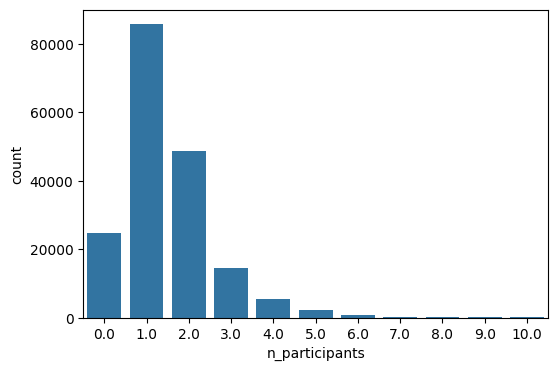

In [393]:
plt.figure(figsize=(6, 4))
sn.countplot(data=df_incidents, x='n_participants')

### min_age_participants



In [394]:
df_incidents['min_age_participants'].value_counts().keys()

Index([    19.0,     18.0,     21.0,     20.0,     22.0,     23.0,     24.0,
           25.0,     17.0,     26.0,
       ...
       141997.0, 585916.0, 563423.0, 231950.0, 495868.0, 644418.0, 672434.0,
       598185.0, 739624.0, 872260.0],
      dtype='float64', name='min_age_participants', length=2765)

In [395]:
len(df_incidents[df_incidents['min_age_participants'] > 80])

2942

In [396]:
df_incidents = df_incidents[df_incidents['min_age_participants'].isnull() | (df_incidents['min_age_participants'] <= 80)]
len(df_incidents)

179428

<Axes: ylabel='Frequency'>

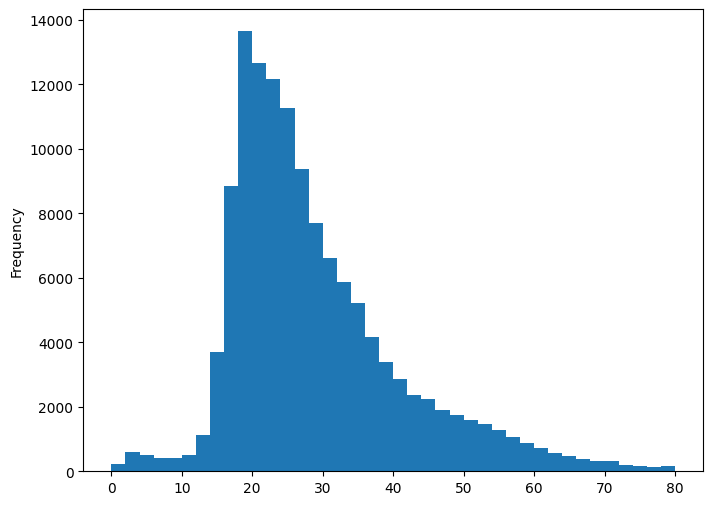

In [397]:
plt.figure(figsize=(8, 6))
df_incidents['min_age_participants'].plot(kind='hist', bins=40)
#sn.countplot(data=df_incidents, x='min_age_participants')

### avg_age_participants



In [398]:
df_incidents['avg_age_participants'].value_counts().keys()

Index([    22.0,     24.0,     20.0,     18.0,     26.0,     23.0,     19.0,
           28.0,     21.0,     25.0,
       ...
       315780.0, 583186.0, 661203.0, 327431.0, 448966.0, 194702.0, 763315.0,
       327888.0, 538576.0, 777647.0],
      dtype='float64', name='avg_age_participants', length=2032)

In [399]:
len(df_incidents[df_incidents['avg_age_participants'] > 80])

1971

In [400]:
df_incidents = df_incidents[df_incidents['avg_age_participants'].isnull() | (df_incidents['avg_age_participants'] <= 80)]
len(df_incidents)

177457

<Axes: ylabel='Frequency'>

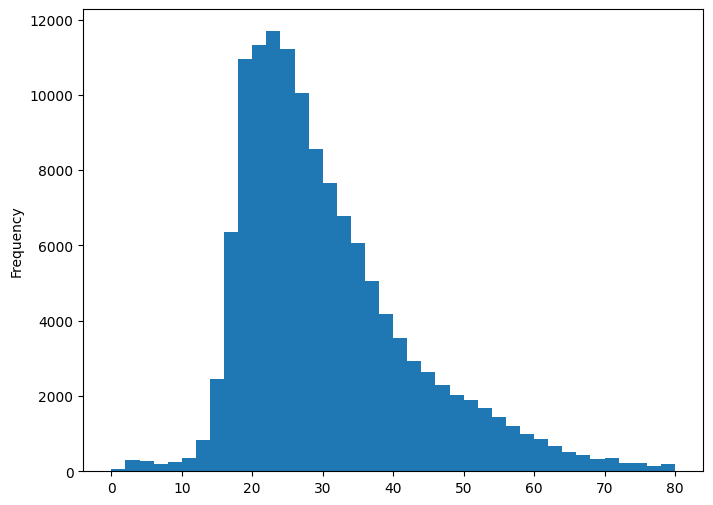

In [401]:
plt.figure(figsize=(8, 6))
df_incidents['avg_age_participants'].plot(kind='hist', bins=40)
#sn.countplot(data=df_incidents, x='avg_age_participants')

### max_age_participants



In [402]:
df_incidents['max_age_participants'].value_counts().keys()

Index([    24.0,     23.0,     22.0,     19.0,     20.0,     21.0,     25.0,
           26.0,     18.0,     27.0,
       ...
       272239.0, 158525.0, 427514.0, 250051.0, 413860.0, 331782.0, 869687.0,
       599162.0, 859332.0, 461985.0],
      dtype='float64', name='max_age_participants', length=1399)

In [403]:
len(df_incidents[df_incidents['max_age_participants'] > 80])

1584

In [404]:
df_incidents = df_incidents[df_incidents['max_age_participants'].isnull() | (df_incidents['max_age_participants'] <= 80)]
len(df_incidents)

175873

<Axes: ylabel='Frequency'>

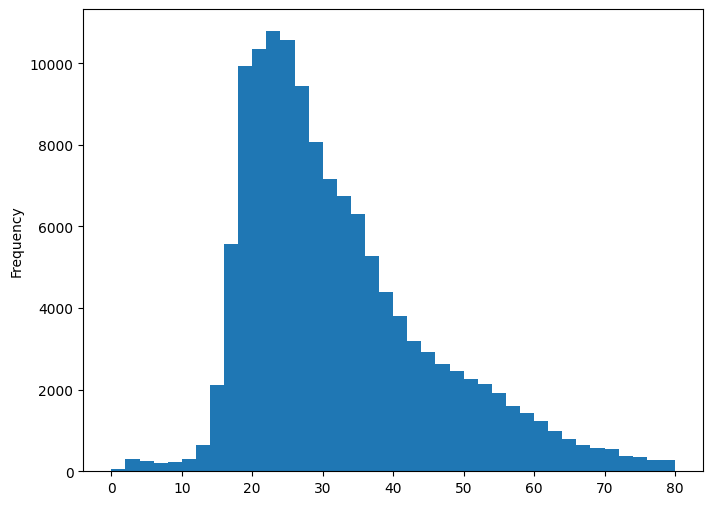

In [405]:
plt.figure(figsize=(8, 6))
df_incidents['max_age_participants'].plot(kind='hist', bins=40)
#sn.countplot(data=df_incidents, x='max_age_participants')

### n_killed

In [406]:
df_incidents['n_killed'].value_counts()

n_killed
0    132076
1     39452
2      3693
3       488
4       113
5        37
6         7
8         4
7         2
9         1
Name: count, dtype: int64

In [407]:
df_backup = df_incidents.copy()

In [408]:
df_incidents = df_incidents[df_incidents['n_killed'] < 6]
len(df_incidents)

175859

<Axes: xlabel='n_killed', ylabel='count'>

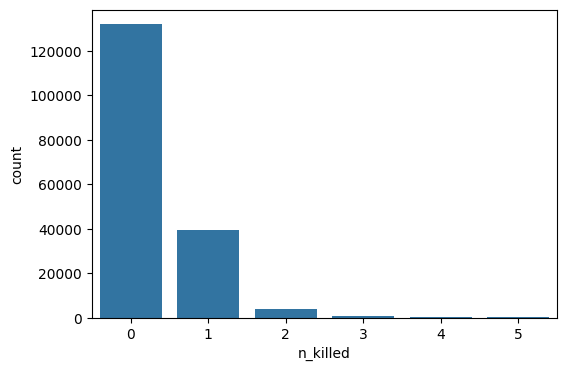

In [409]:
plt.figure(figsize=(6, 4))
sn.countplot(data=df_incidents, x='n_killed')

### n_injured

In [410]:
df_incidents['n_injured'].value_counts()

n_injured
0    113237
1     53169
2      7275
3      1544
4       437
5       129
6        45
7        16
8         4
9         3
Name: count, dtype: int64

In [411]:
df_backup = df_incidents.copy()

In [412]:
df_incidents = df_incidents[df_incidents['n_injured'] < 7]
len(df_incidents)

175836

<Axes: xlabel='n_injured', ylabel='count'>

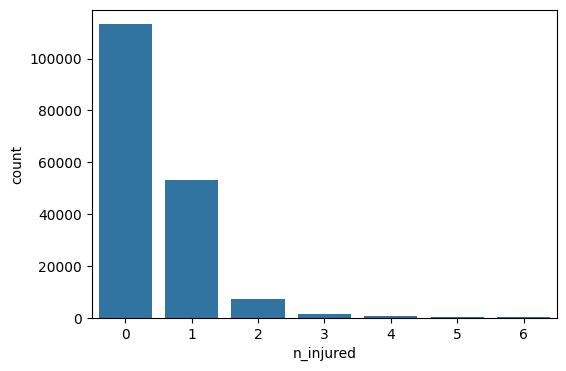

In [413]:
plt.figure(figsize=(6, 4))
sn.countplot(data=df_incidents, x='n_injured')

### n_arrested

In [414]:
df_incidents['n_arrested'].value_counts()

n_arrested
0.0     87648
1.0     48117
2.0      8431
3.0      2675
4.0      1027
5.0       316
6.0        96
7.0        39
8.0        29
9.0        13
10.0       10
Name: count, dtype: int64

In [415]:
df_backup = df_incidents.copy()

In [416]:
df_incidents = df_backup.copy()

In [417]:
df_incidents = df_incidents[df_incidents['n_arrested'].isnull() | (df_incidents['n_arrested'] < 7)]
len(df_incidents)

175745

<Axes: xlabel='n_arrested', ylabel='count'>

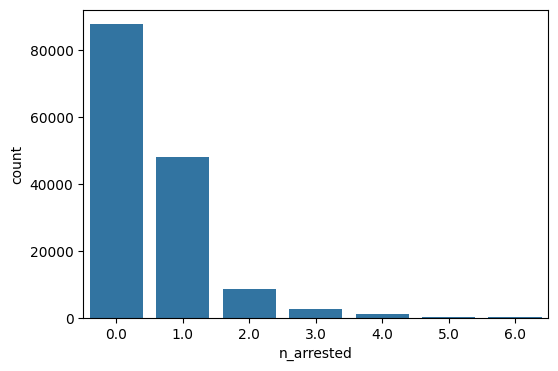

In [418]:
plt.figure(figsize=(6, 4))
sn.countplot(data=df_incidents, x='n_arrested')

### n_males

In [419]:
df_incidents['n_males'].value_counts()

n_males
1.0     82006
2.0     36147
3.0     10202
0.0      6059
4.0      3573
5.0      1203
6.0       348
7.0        86
8.0        37
9.0         6
10.0        6
Name: count, dtype: int64

In [420]:
df_backup = df_incidents.copy()

In [421]:
df_incidents = df_incidents[(df_incidents['n_males'] < 9) | df_incidents['n_males'].isnull()]
len(df_incidents)

175733

<Axes: xlabel='n_males', ylabel='count'>

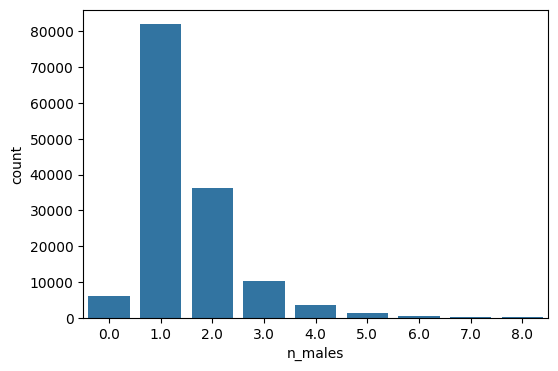

In [422]:
plt.figure(figsize=(6, 4))
sn.countplot(data=df_incidents, x='n_males')

### n_females

In [423]:
df_incidents['n_females'].value_counts()

n_females
0.0    113241
1.0     23401
2.0      2569
3.0       372
4.0        63
5.0        13
6.0         2
Name: count, dtype: int64

In [424]:
df_backup = df_incidents.copy()

In [425]:
df_incidents = df_incidents[df_incidents['n_females'].isnull() | (df_incidents['n_females'] < 5)]

In [426]:
len(df_incidents)

175718

<Axes: xlabel='n_females', ylabel='count'>

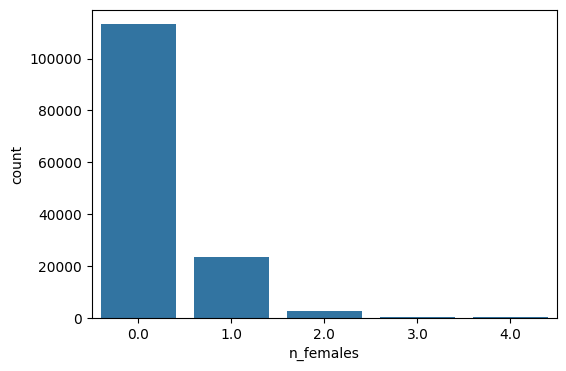

In [427]:
plt.figure(figsize=(6, 4))
sn.countplot(data=df_incidents, x='n_females')

### n_males / n_participants

In [428]:
df_incidents['males_ratio'] = df_incidents['n_males'] / df_incidents['n_participants']

In [429]:
df_incidents['males_ratio'].value_counts()

males_ratio
1.000000    113241
0.500000     12699
0.000000      6056
0.666667      3885
0.750000      1423
0.333333       907
0.800000       587
0.600000       269
0.833333       189
0.250000       113
0.400000        94
0.857143        45
0.714286        42
0.200000        30
0.571429        19
0.875000        17
0.625000        13
0.428571         6
0.888889         6
0.555556         3
0.777778         2
Name: count, dtype: int64

Now let's see how many incidents have more than half participants as males:

In [430]:
more_males_df = df_incidents[df_incidents['males_ratio'] > 0.5]
print(len(more_males_df), f"{100*len(more_males_df)/len(df_incidents):.4f}% of total")

119741 68.1438% of total


<Axes: ylabel='Frequency'>

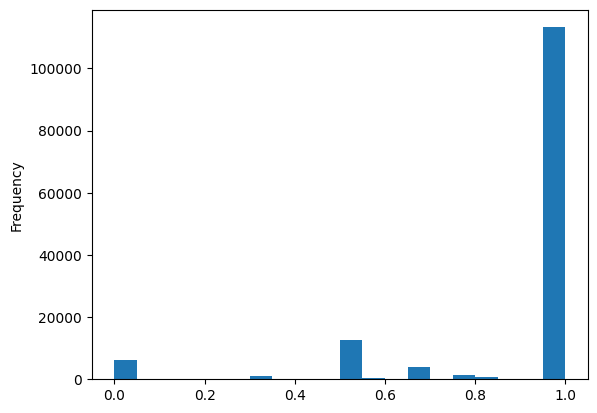

In [431]:
%matplotlib inline
df_incidents['males_ratio'].plot(kind='hist', bins=20)

### n_females / n_participants

In [432]:
df_incidents['females_ratio'] = df_incidents['n_females'] / df_incidents['n_participants']

In [433]:
df_incidents['females_ratio'].value_counts()

females_ratio
0.000000    113241
0.500000     12699
1.000000      6056
0.333333      3885
0.250000      1423
0.666667       907
0.200000       587
0.400000       269
0.166667       189
0.750000       113
0.600000        94
0.142857        45
0.285714        42
0.800000        30
0.428571        19
0.125000        17
0.375000        13
0.571429         6
0.111111         6
0.444444         3
0.222222         2
Name: count, dtype: int64

Now let's see how many incidents have more than half participants as females:

In [434]:
more_females_df = df_incidents[df_incidents['females_ratio'] > 0.5]
print(len(more_females_df), f"{100*len(more_females_df)/len(df_incidents):.4f}% of total")

7206 4.1009% of total


<Axes: ylabel='Frequency'>

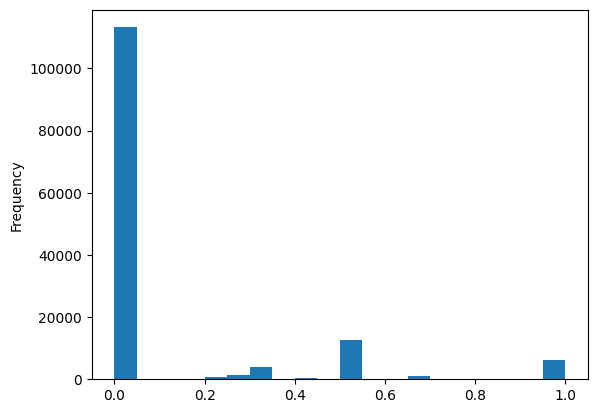

In [435]:
%matplotlib inline
df_incidents['females_ratio'].plot(kind='hist', bins=20)

We can also drop the fields `participant_age1`, `participant_age_group1`, `participant_gender1` because their information is *exact* **ONLY** when there is **1** participant, but we already know age, age group and gender from `min_age_participants`, `n_males`, `n_females`.

# Other Data Visualization

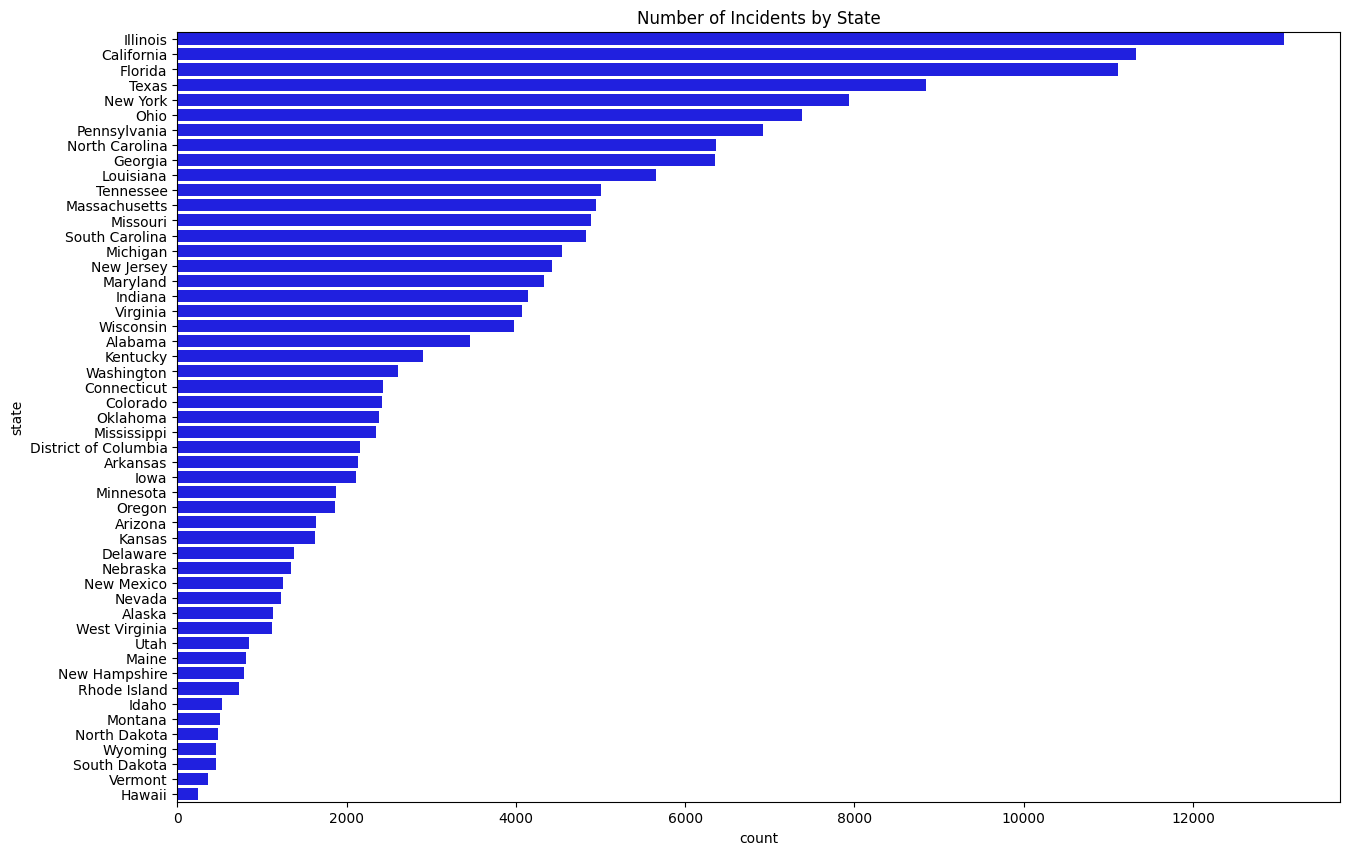

In [436]:
# Bar plot for the number of incidents by state:
# This will show which states have the highest number of incidents.
plt.figure(figsize=(15,10))
sn.countplot(data=df_incidents, y='state', color='blue', order=df_incidents['state'].value_counts().index)
plt.title('Number of Incidents by State')
plt.show()

TODO: Possible indicators
* #incidents_by_state / state_population (2020);
* #killed_by_state / #incidents_by_state;
* n_males / n_participants;
* n_females / n_participants.

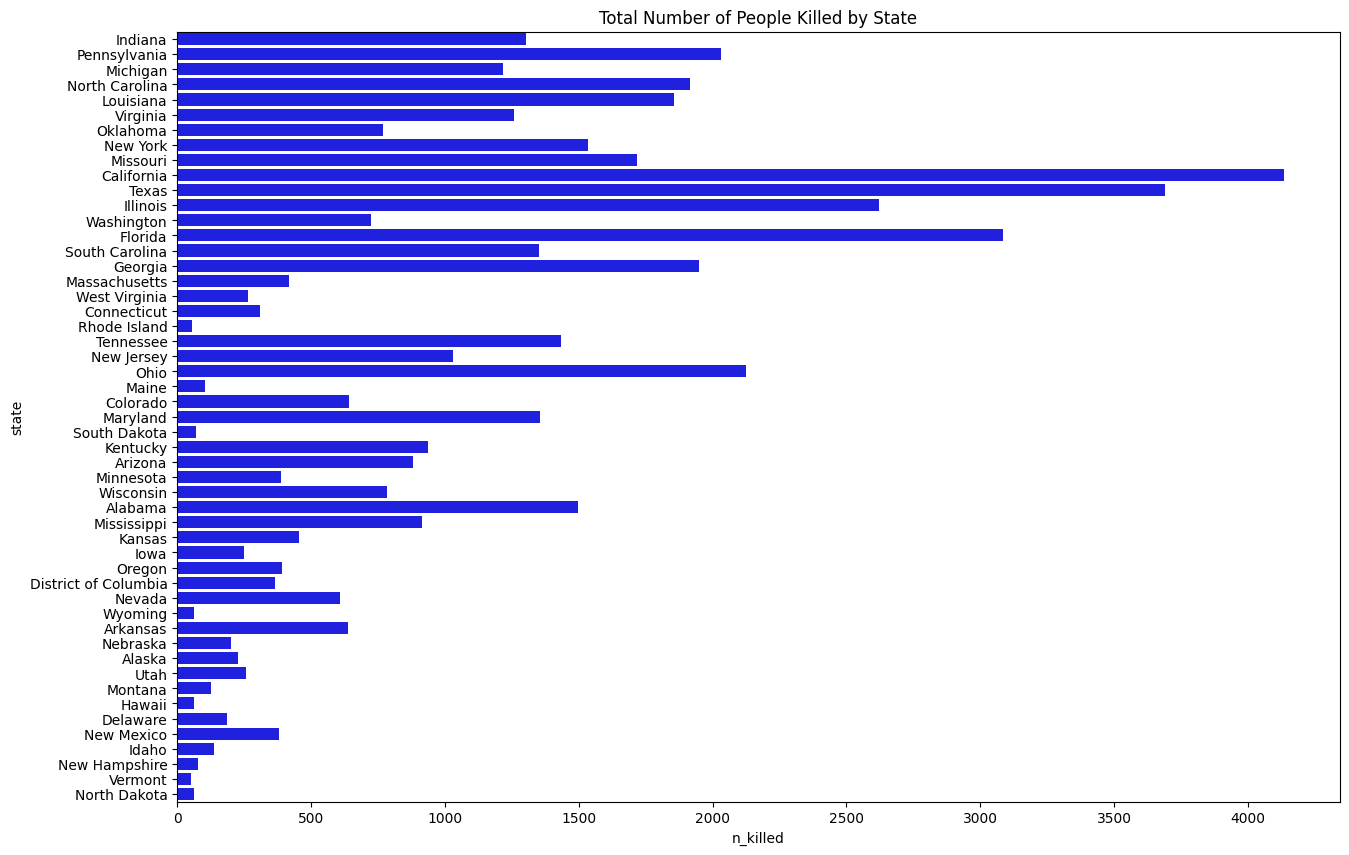

In [437]:
#Bar plot for number of people killed by state

plt.figure(figsize=(15,10))
sn.barplot(data=df_incidents, y='state', x='n_killed', color='blue', estimator=sum, errorbar=None)
plt.title('Total Number of People Killed by State')
plt.show()


In [438]:
# Checking for invalid states
valid_states = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
    'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
    'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
    'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
    'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
    'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
    'West Virginia', 'Wisconsin', 'Wyoming', 'District of Columbia'
]

#Added District of Columbia to the valid states even though it not a real state but it is valid

df_incidents['is_valid_state'] = df_incidents['state'].isin(valid_states)
invalid_states = df_incidents[~df_incidents['is_valid_state']]
print(f"Number of records with invalid states: {len(invalid_states)}")

Number of records with invalid states: 0


In [439]:
df_incidents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175718 entries, 0 to 239674
Data columns (total 36 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date                       175718 non-null  object        
 1   state                      175718 non-null  object        
 2   city_or_county             175718 non-null  object        
 3   address                    163366 non-null  object        
 4   latitude                   169449 non-null  float64       
 5   longitude                  169449 non-null  float64       
 6   congressional_district     166248 non-null  float64       
 7   state_house_district       146151 non-null  float64       
 8   state_senate_district      150909 non-null  float64       
 9   participant_age1           128862 non-null  float64       
 10  participant_age_group1     135152 non-null  object        
 11  participant_gender1        139646 non-null  object       

In [440]:
df_incidents['avg_age_participants'] = df_incidents['avg_age_participants'].astype(float)

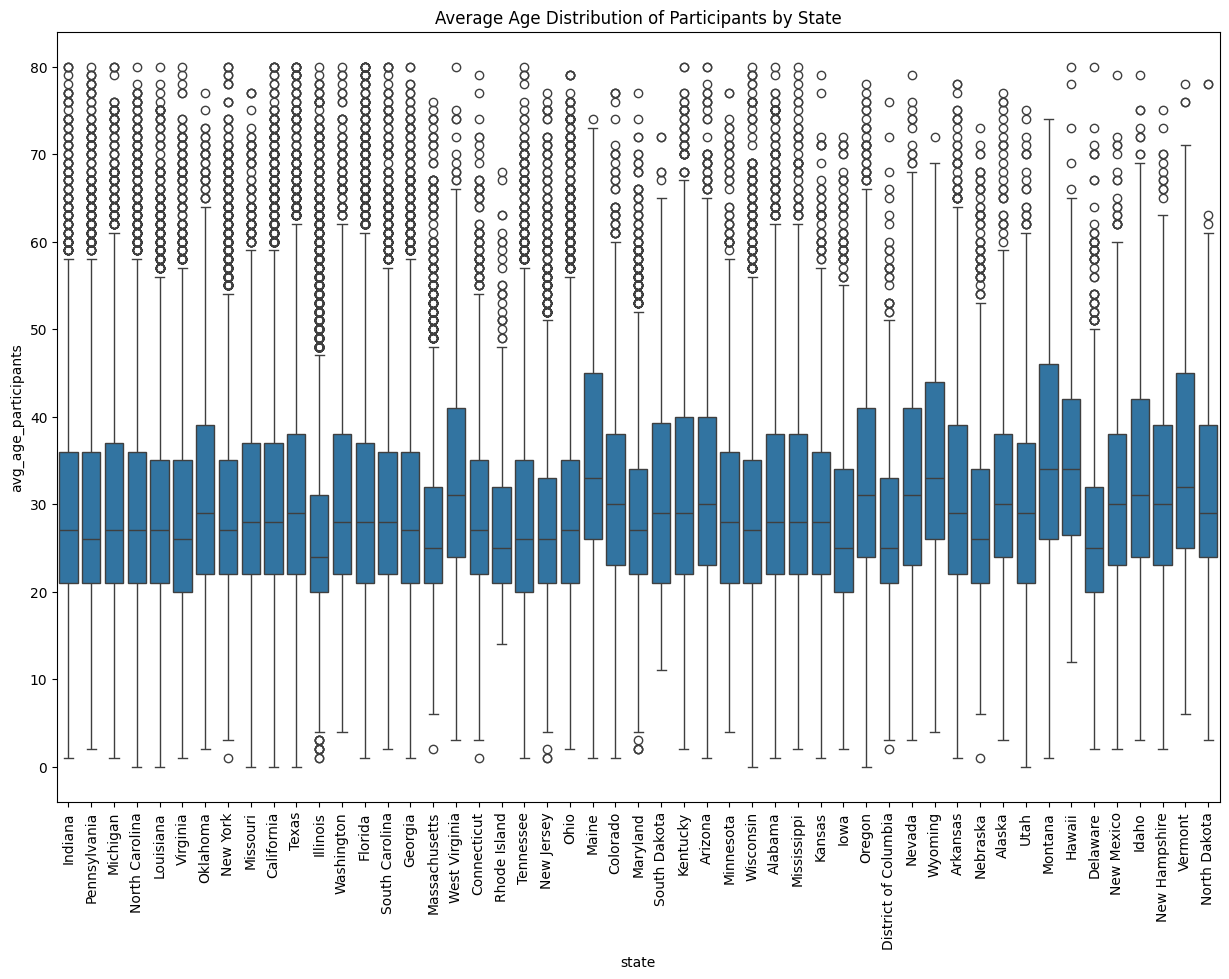

In [441]:
# Box plot for age distributions by state:
# This can give an idea about the age distribution of participants involved in incidents for each state.

plt.figure(figsize=(15,10))
sn.boxplot(data=df_incidents, x='state', y='avg_age_participants')
plt.xticks(rotation=90)
plt.title('Average Age Distribution of Participants by State')
plt.show()

In [442]:
missing_values = df_incidents.isnull().sum()
print(f"Missing values:\n{missing_values}")

Missing values:
date                             0
state                            0
city_or_county                   0
address                      12352
latitude                      6269
longitude                     6269
congressional_district        9470
state_house_district         29567
state_senate_district        24809
participant_age1             46856
participant_age_group1       40566
participant_gender1          36072
min_age_participants         46855
avg_age_participants         46856
max_age_participants         46856
n_participants_child         40566
n_participants_teen          40566
n_participants_adult         40566
n_males                      36072
n_females                    36072
n_killed                         0
n_injured                        0
n_arrested                   27435
n_unharmed                   27435
n_participants                   0
notes                        59509
incident_characteristics1      225
incident_characteristics2    71959
date

In [443]:
numerical_fields = [
    'min_age_participants', 'avg_age_participants', 'max_age_participants',
    'n_participants_child', 'n_participants_teen', 'n_participants_adult',
    'n_males', 'n_females', 'n_killed', 'n_injured', 'n_arrested', 'n_unharmed',
    'n_participants'
]

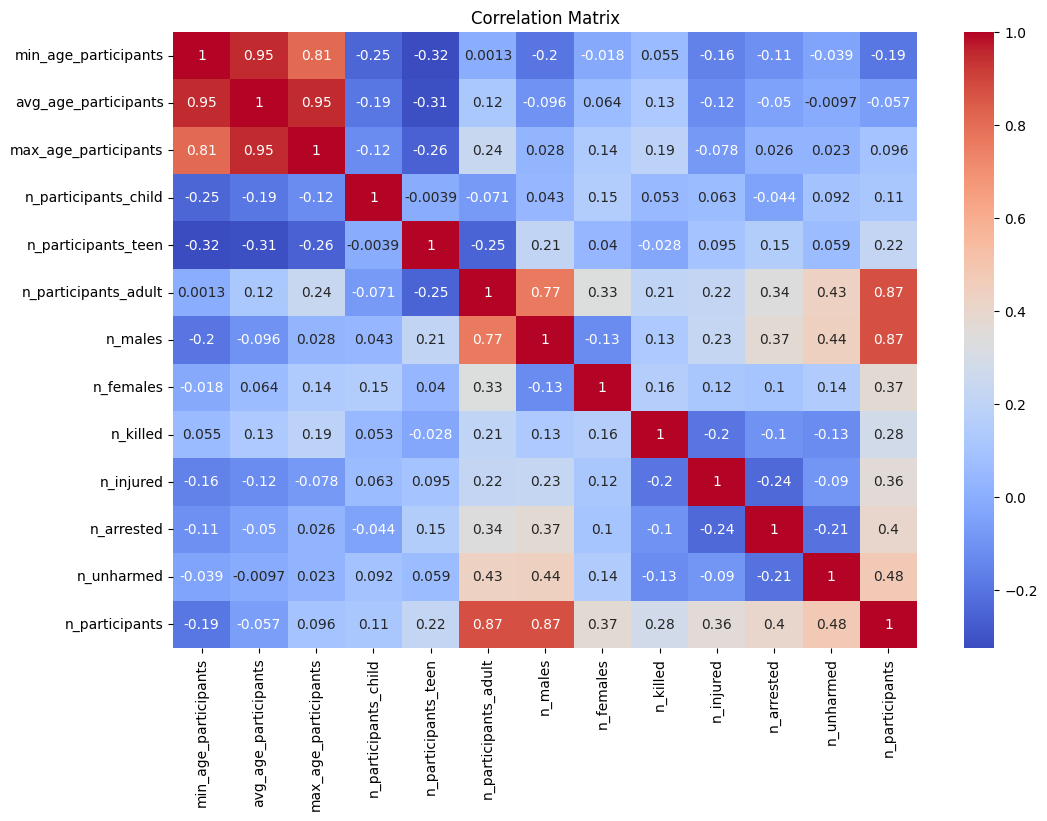

In [444]:
# 4. Discover new or confirm expected dependencies or correlations between attributes
correlation_matrix = df_incidents[numerical_fields].corr()
plt.figure(figsize=(12,8))
sn.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [445]:
dist_approx_fields = ['min_age_participants', 'avg_age_participants', 'max_age_participants']

<Figure size 1000x600 with 0 Axes>

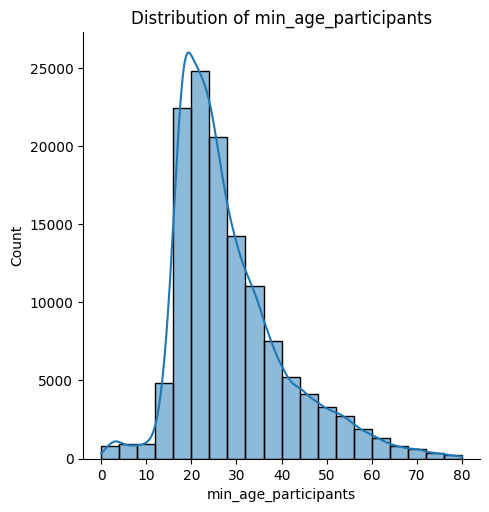

<Figure size 1000x600 with 0 Axes>

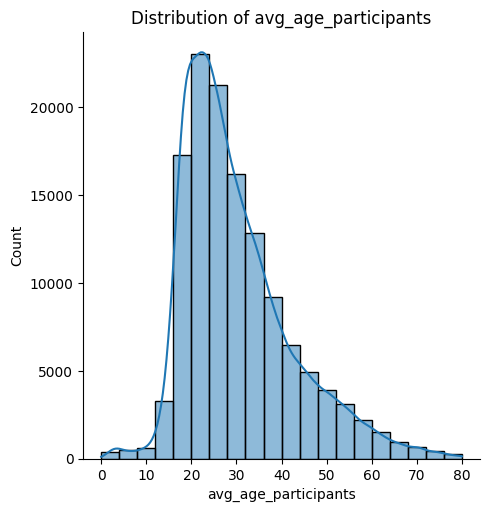

<Figure size 1000x600 with 0 Axes>

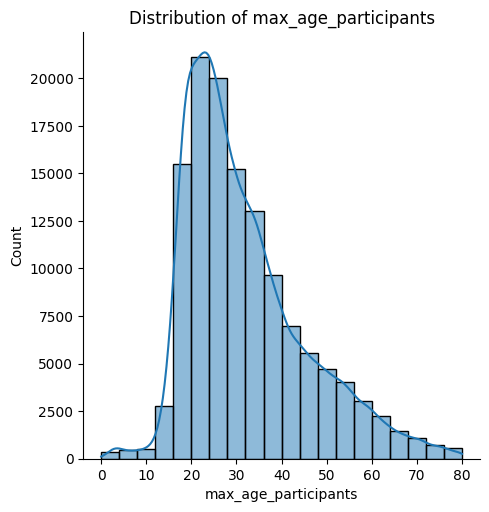

In [446]:
# 5. Check specific application dependent assumptions (like normal distribution)
## a. Check for normal distribution
for field in dist_approx_fields:
    plt.figure(figsize=(10,6))
    sn.displot(df_incidents[field].dropna(), kde=True, bins=20)
    plt.title(f"Distribution of {field}")
    plt.show()

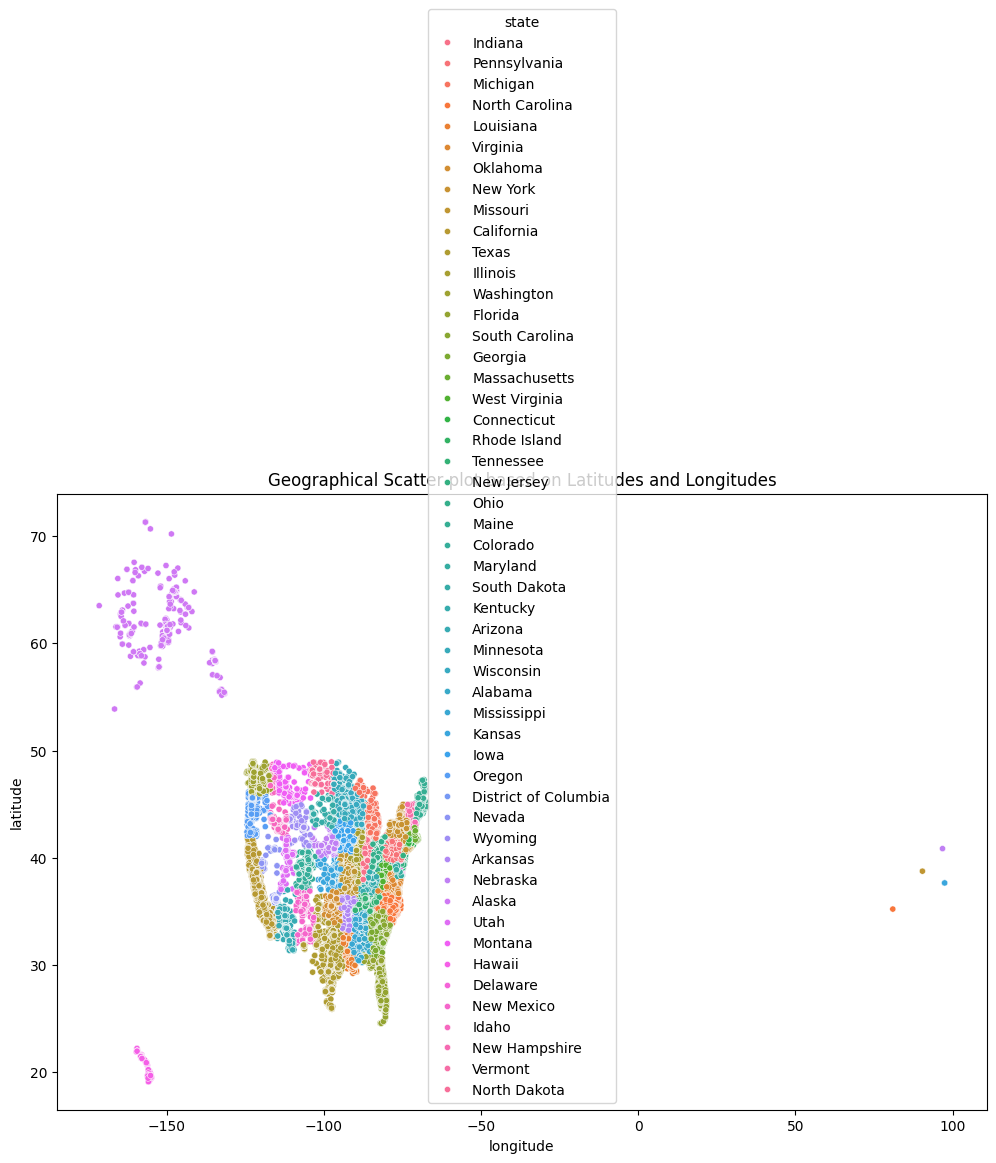

In [447]:
# Addressing the latitude and longitude attributes to visualize data geographically
plt.figure(figsize=(12, 8))
sn.scatterplot(x=df_incidents['longitude'], y=df_incidents['latitude'], hue=df_incidents['state'], legend=True, s=20)
plt.title("Geographical Scatter plot based on Latitudes and Longitudes")
plt.show()

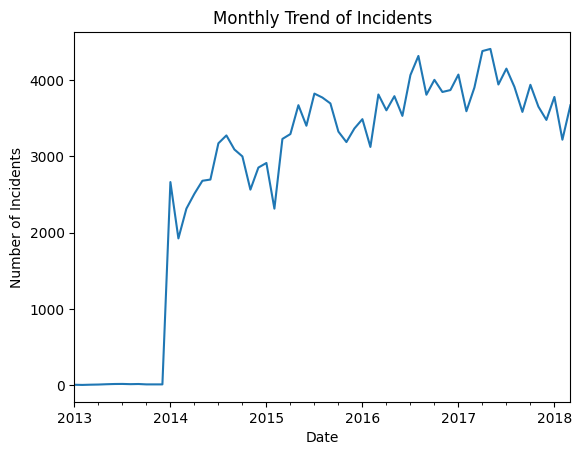

In [448]:
#Time Series Analysis
monthly_incidents = df_incidents.resample('M', on='datetime').size()
monthly_incidents.plot()
plt.title('Monthly Trend of Incidents')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.show()


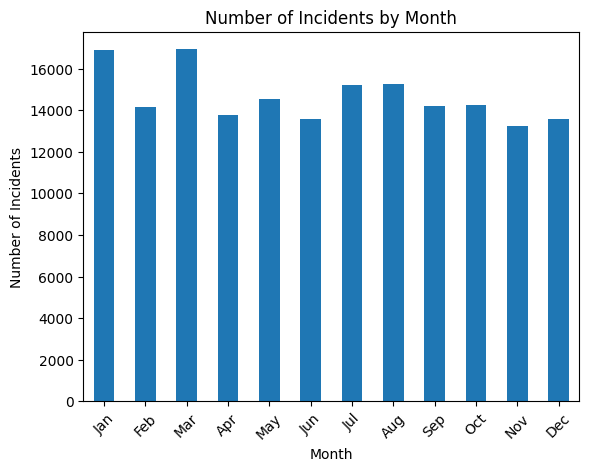

In [449]:
#Seasonal analysis
#To see if there's a pattern during certain months

# Group by month and count the number of incidents
monthly_incidents = df_incidents.groupby(df_incidents['datetime'].dt.month).size()

# Plotting
monthly_incidents.plot(kind='bar')
plt.title('Number of Incidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()



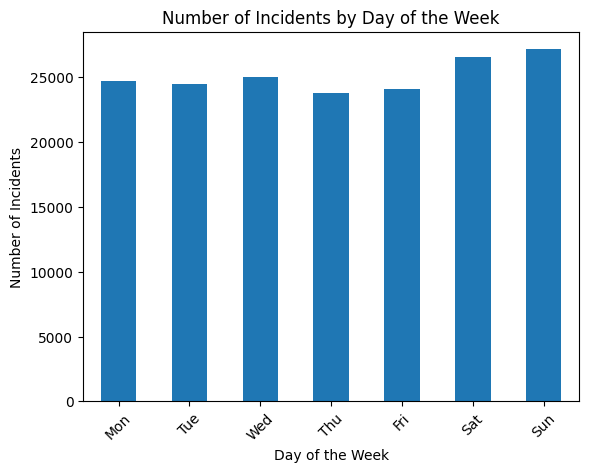

In [450]:
# Day-of-week analysis
# To see if there's a pattern on certain days of the week

# Group by day of the week and count the number of incidents
# Note: By default, Monday=0 and Sunday=6
daily_incidents = df_incidents.groupby(df_incidents['datetime'].dt.dayofweek).size()

# Plotting
daily_incidents.plot(kind='bar')
plt.title('Number of Incidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Incidents')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
plt.show()

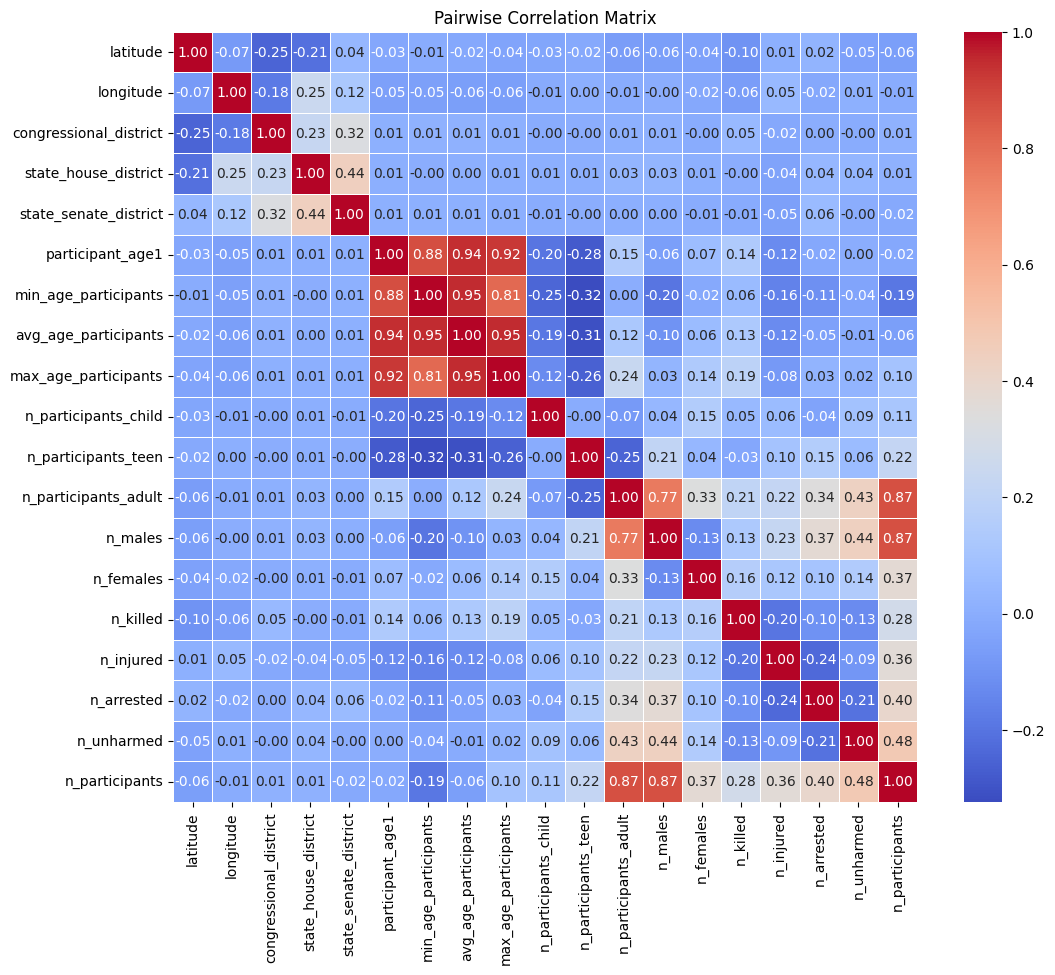

In [452]:
correlation_matrix = df_incidents[['latitude', 'longitude', 'congressional_district', 'state_house_district', 'state_senate_district', 'participant_age1', 'min_age_participants', 'avg_age_participants', 'max_age_participants', 'n_participants_child', 'n_participants_teen', 'n_participants_adult', 'n_males', 'n_females', 'n_killed', 'n_injured', 'n_arrested', 'n_unharmed', 'n_participants']].corr()

# Visualize the correlation matrix
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Pairwise Correlation Matrix')
plt.show()


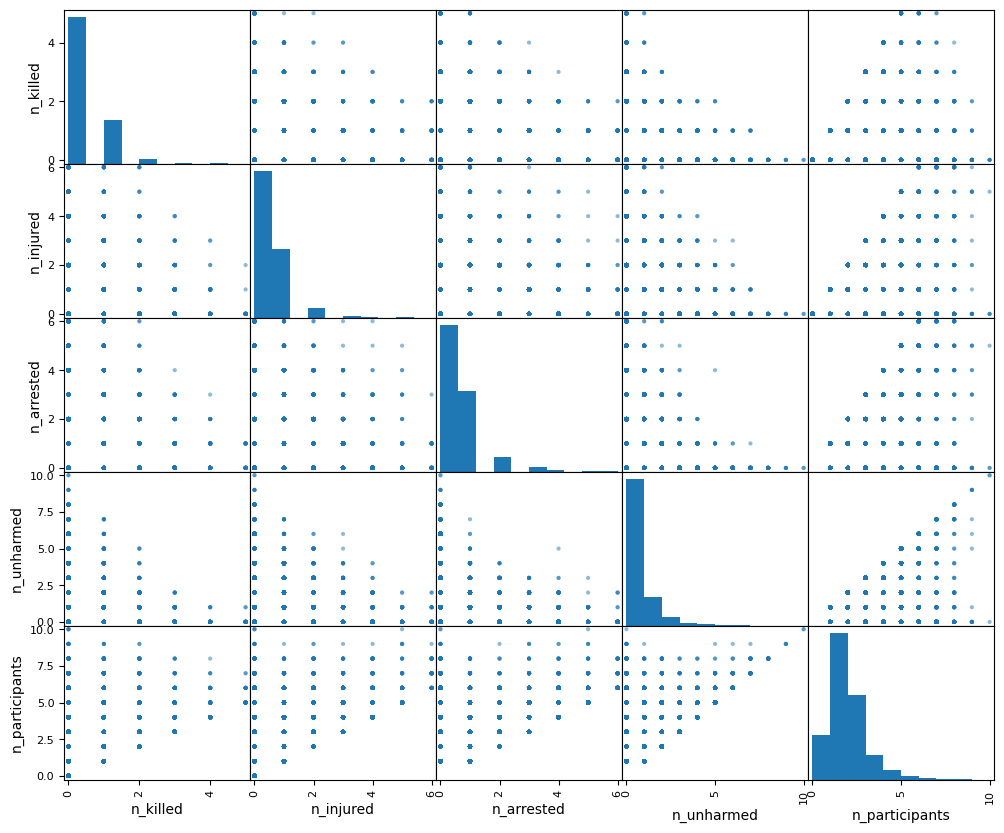

In [454]:
pd.plotting.scatter_matrix(df_incidents[['n_killed', 'n_injured', 'n_arrested', 'n_unharmed', 'n_participants']], figsize=(12, 10))
plt.show()

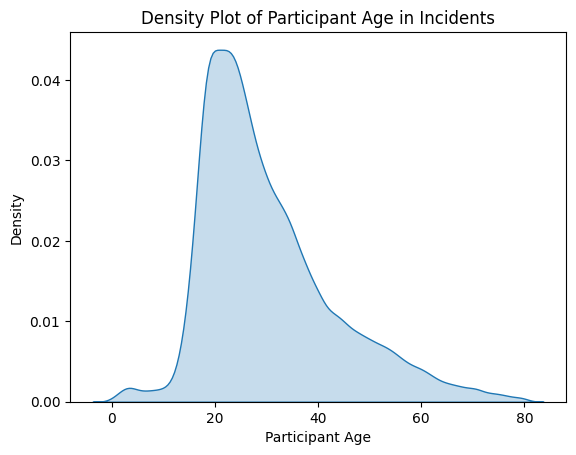

In [457]:
# Density plot for participant age
sns.kdeplot(df_incidents['participant_age1' ].dropna(), fill=True)
plt.xlabel('Participant Age')
plt.ylabel('Density')
plt.title('Density Plot of Participant Age in Incidents')
plt.show()

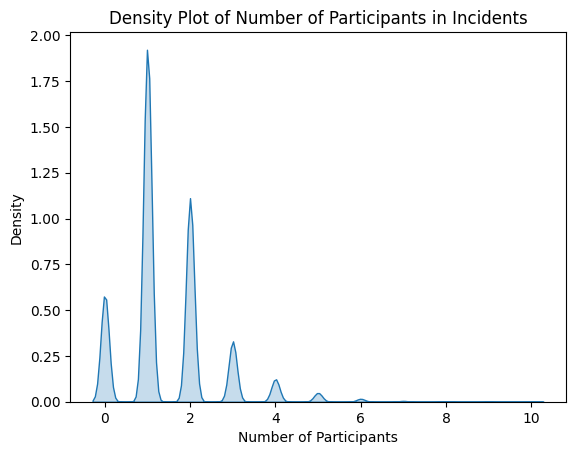

In [458]:
# Density plot for the number of participants
sns.kdeplot(df_incidents['n_participants'].dropna(), fill=True)
plt.xlabel('Number of Participants')
plt.ylabel('Density')
plt.title('Density Plot of Number of Participants in Incidents')
plt.show()

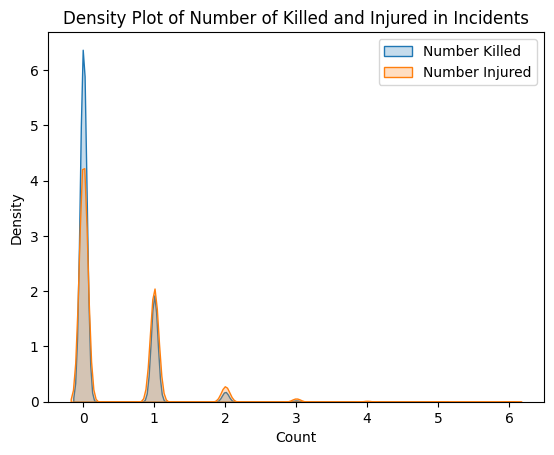

In [459]:
# Density plot for the number of killed and injured
sns.kdeplot(df_incidents['n_killed'].dropna(), label='Number Killed', fill=True)
sns.kdeplot(df_incidents['n_injured'].dropna(), label='Number Injured', fill=True)
plt.xlabel('Count')
plt.ylabel('Density')
plt.title('Density Plot of Number of Killed and Injured in Incidents')
plt.legend()
plt.show()

In [460]:
#Feature Extraction from the incident_characteristics column
#Convert text to lowercase to ensure consistency. Remove any leading or trailing whitespaces.
df_incidents['incident_characteristics1'] = df_incidents['incident_characteristics1'].str.lower().str.strip()

#Extract relevant information from the text.
# For example, you might want to create binary features indicating the presence of specific characteristics (e.g., "shot," "wounded," "dead").
df_incidents['shot'] = df_incidents['incident_characteristics1'].str.contains('shot', case=False, na=False).astype(int)
df_incidents['wounded'] = df_incidents['incident_characteristics1'].str.contains('wounded', case=False, na=False).astype(int)
df_incidents['dead'] = df_incidents['incident_characteristics1'].str.contains('dead', case=False, na=False).astype(int)



In [462]:
#Print the first few rows of the dataframe
df_incidents.head()

,date,state,city_or_county,address,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,...,year,month,day,weekday,males_ratio,females_ratio,is_valid_state,shot,wounded,dead
0,2015-05-02,Indiana,Indianapolis,Lafayette Road and Pike Plaza,39.8322,-86.2492,7.0,94.0,33.0,19.0,...,2015,5,2,5,1.0,0.0,True,1,1,0
1,2017-04-03,Pennsylvania,Kane,5647 US 6,41.6645,-78.7856,5.0,NaN,NaN,62.0,...,2017,4,3,0,1.0,0.0,True,1,0,1
2,2016-11-05,Michigan,Detroit,6200 Block of East McNichols Road,42.4190,-83.0393,14.0,4.0,2.0,NaN,...,2016,11,5,5,NaN,NaN,True,1,1,0
5,2014-01-18,North Carolina,Wayne County,4700 block of U.S. Highway 70 East,35.1847,-77.9527,13.0,4.0,7.0,65.0,...,2014,1,18,5,1.0,0.0,True,1,1,0
6,2018-01-25,Louisiana,Zachary,18733 Samuels Rd,30.6069,-91.2270,6.0,63.0,15.0,30.0,...,2018,1,25,3,1.0,0.0,True,1,1,0
